In [1]:
# The autoreload extension allows you to tweak the code in the imported modules
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import ML_Model as mlm
import Data_into_Matrix as DiM
import plot_helper as ph

import numpy as np
import pickle

from sklearn.ensemble import RandomForestRegressor

# Additional content

## Regression tree behaviour

theoretical maximum depth of tree: 5.977279923499917
Best accuracy achieved by forest: 0.0842568425555204
Best accuracy achieved by tree: 0.09417225805200413


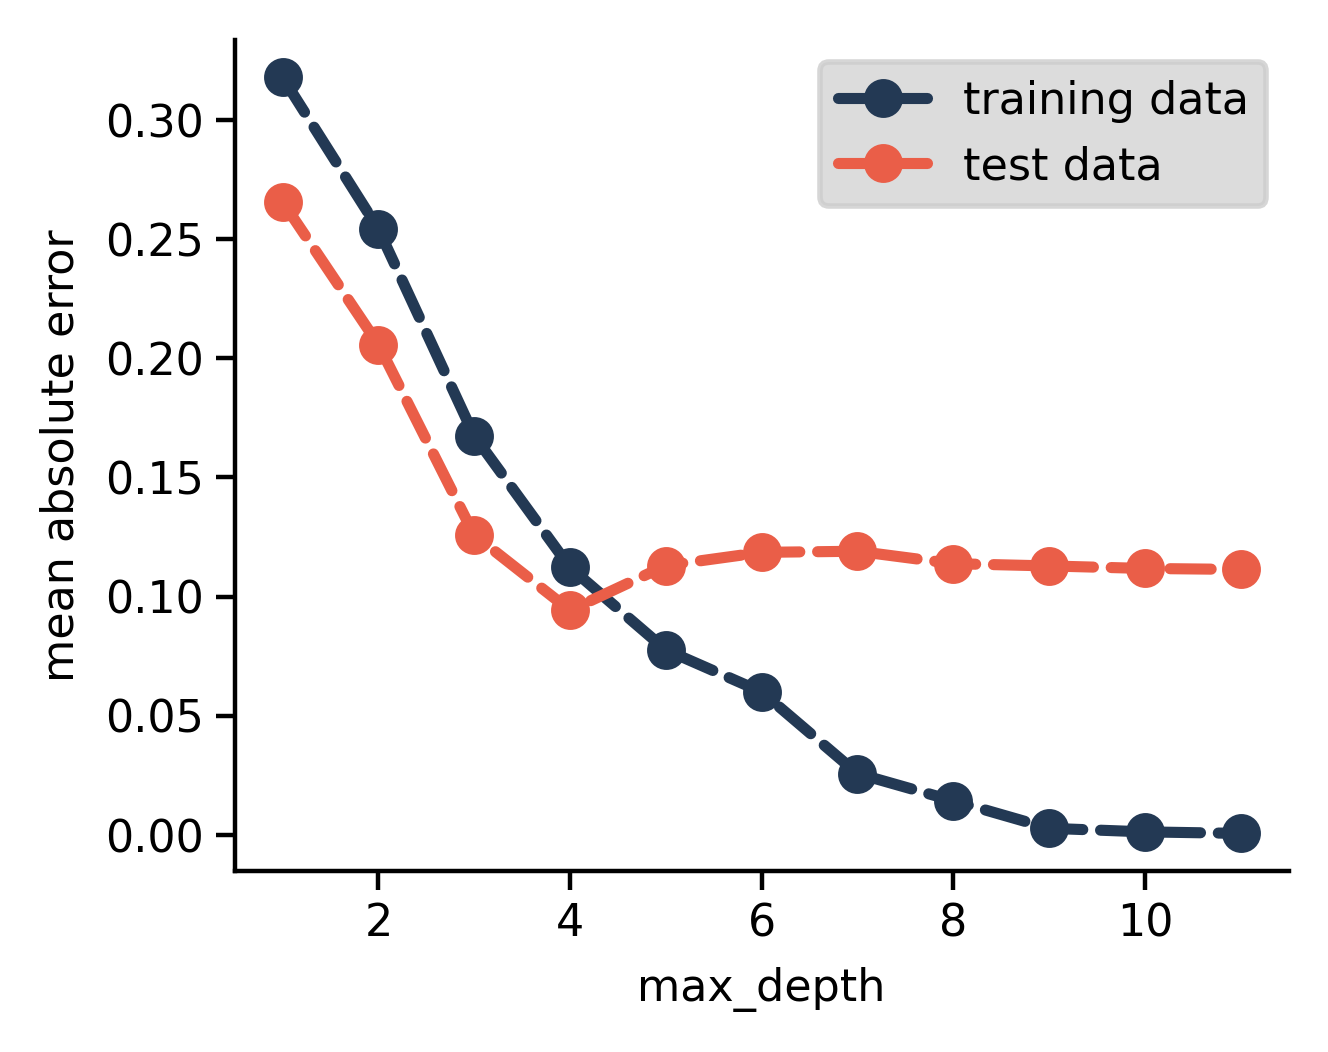

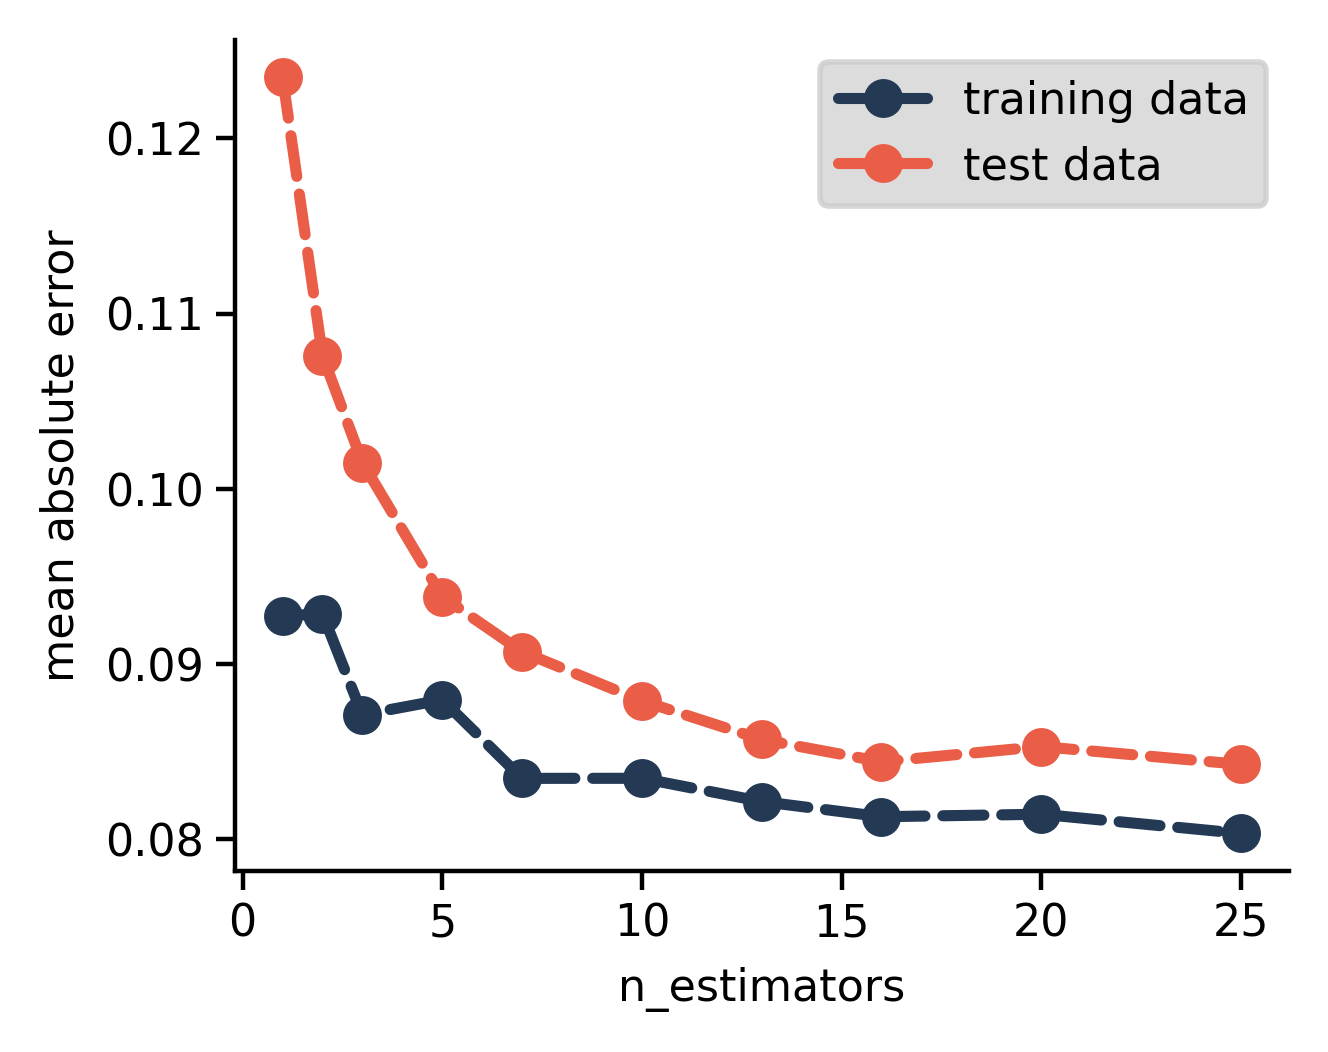

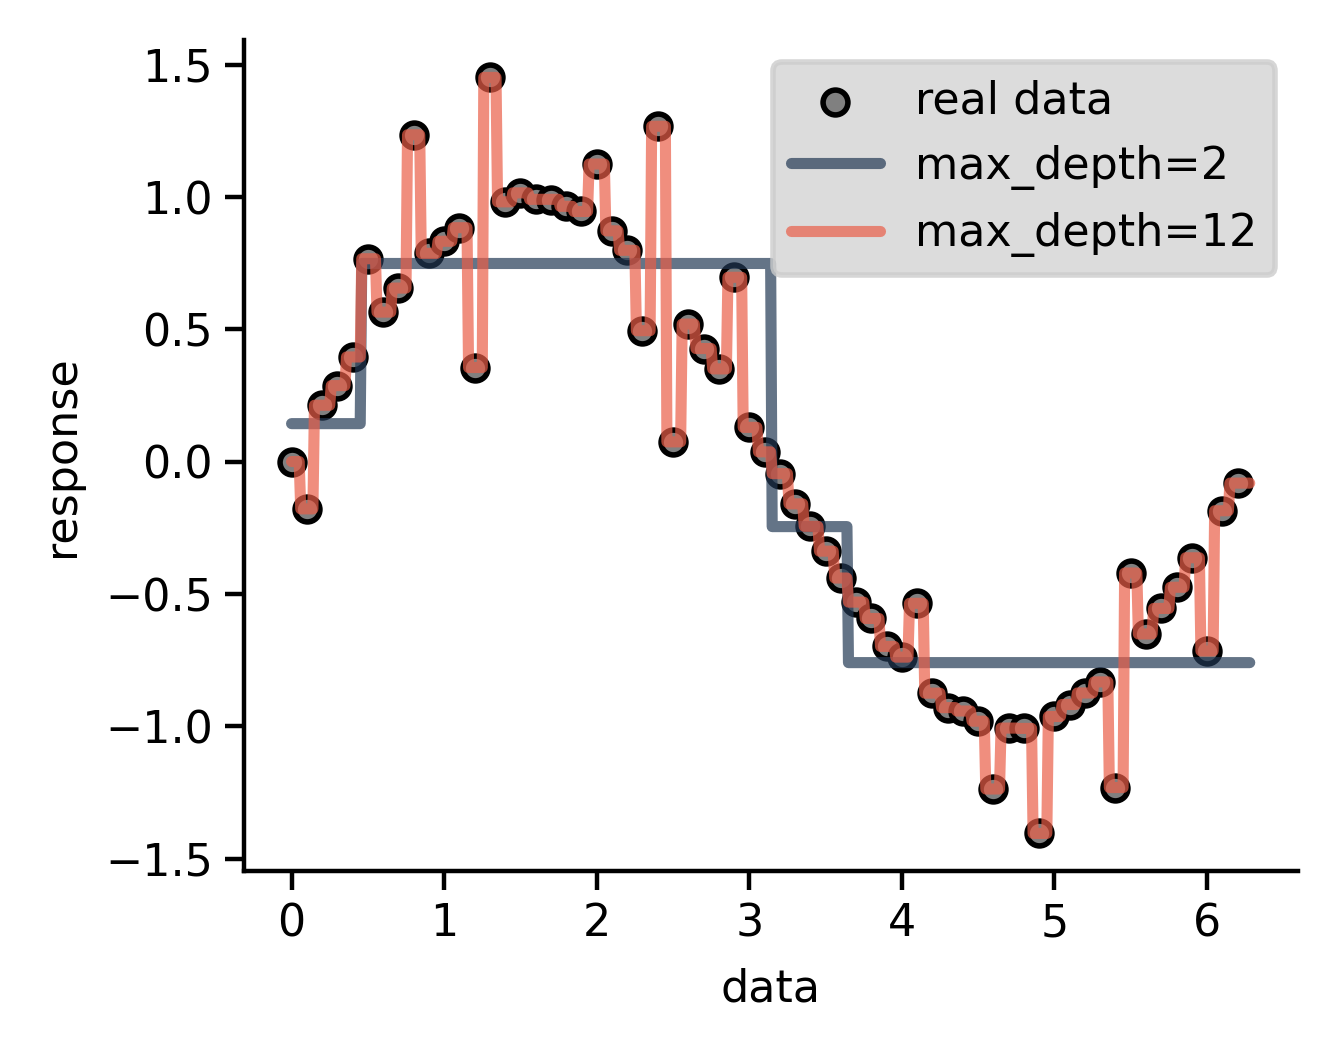

In [201]:
ph.plot_regression_tree_behaviour(num_for_average=50)

# Data analysis

## Principal component analysis


### Calculating data

In [110]:
mlm.vpc(
    pickle_name="pca/pca_no_no.pkl",
    cT_in_log_values = False
)

variance ratio component 1: 0.20430615515758785
variance ratio component 2: 0.06266502517127706


In [10]:
mlm.vpc(
    features=DiM.minimum_loss_features,
    filtering_arguments=mlm.single_non_conventional_filter,
    pickle_name="pca/pca_min_nc.pkl",
    cT_in_log_values = False,
    with_properties = True
)

variance ratio component 1: 0.08458833553686355
variance ratio component 2: 0.058514061614509665


In [122]:
mlm.vpc(
    features=DiM.suggested_features,
    filtering_arguments=mlm.single_non_conventional_filter,
    pickle_name="pca/pca_sug_nc.pkl",
    cT_in_log_values = False,
    with_properties = True
)

variance ratio component 1: 0.9939483118950647
variance ratio component 2: 0.006014147537793398


### Plotting data

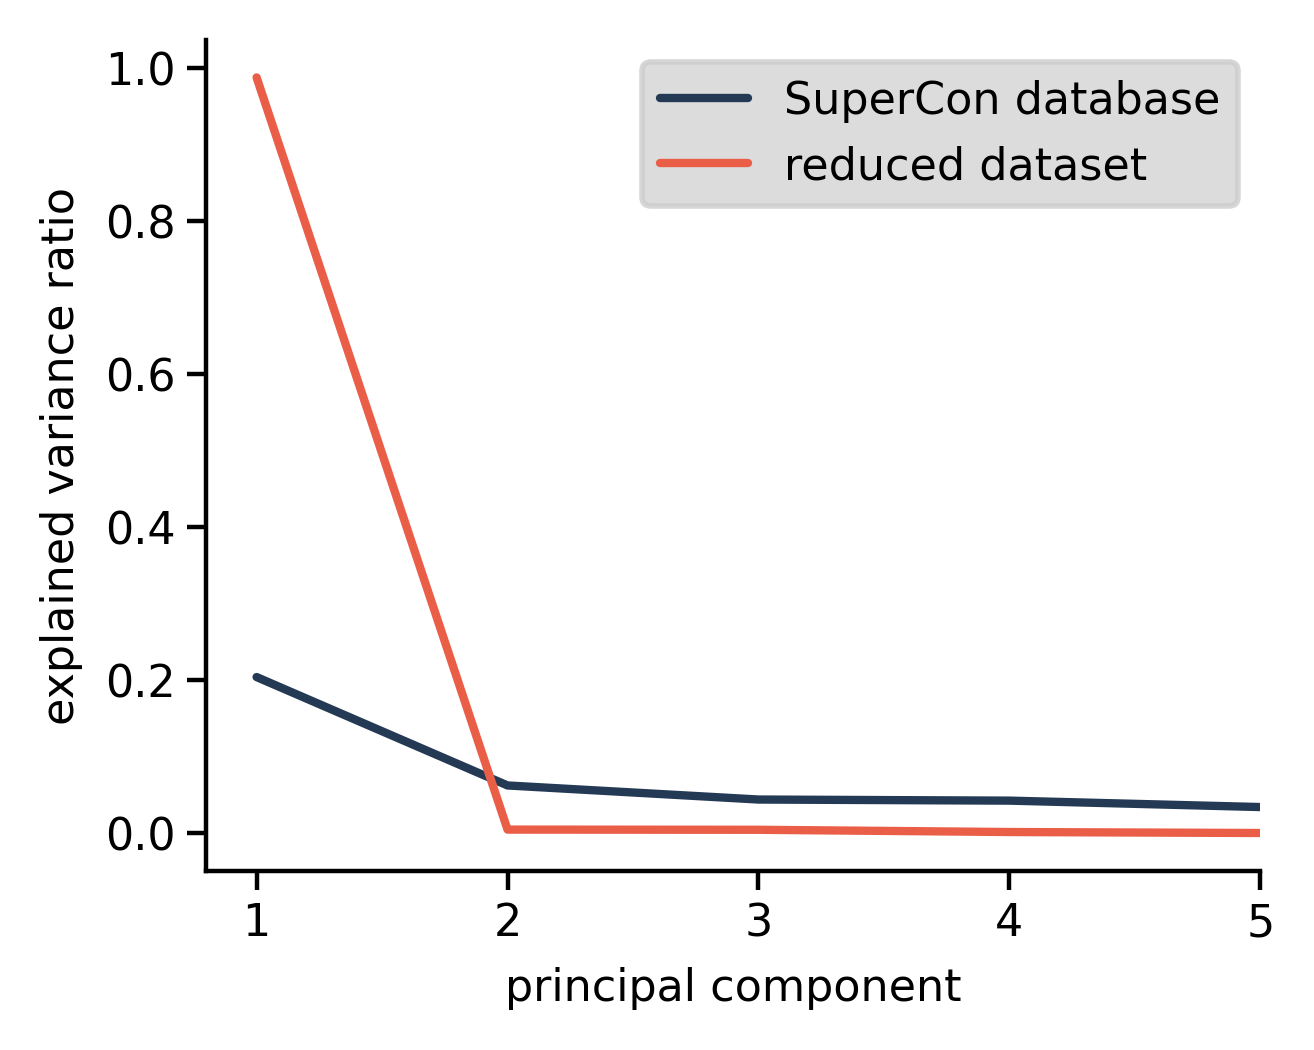

In [9]:
ph.plot_pca_evr(pickle_names=["pca/pca_no_no.pkl", "pca/pca_min_nc.pkl"], xlim=[0.8,5])

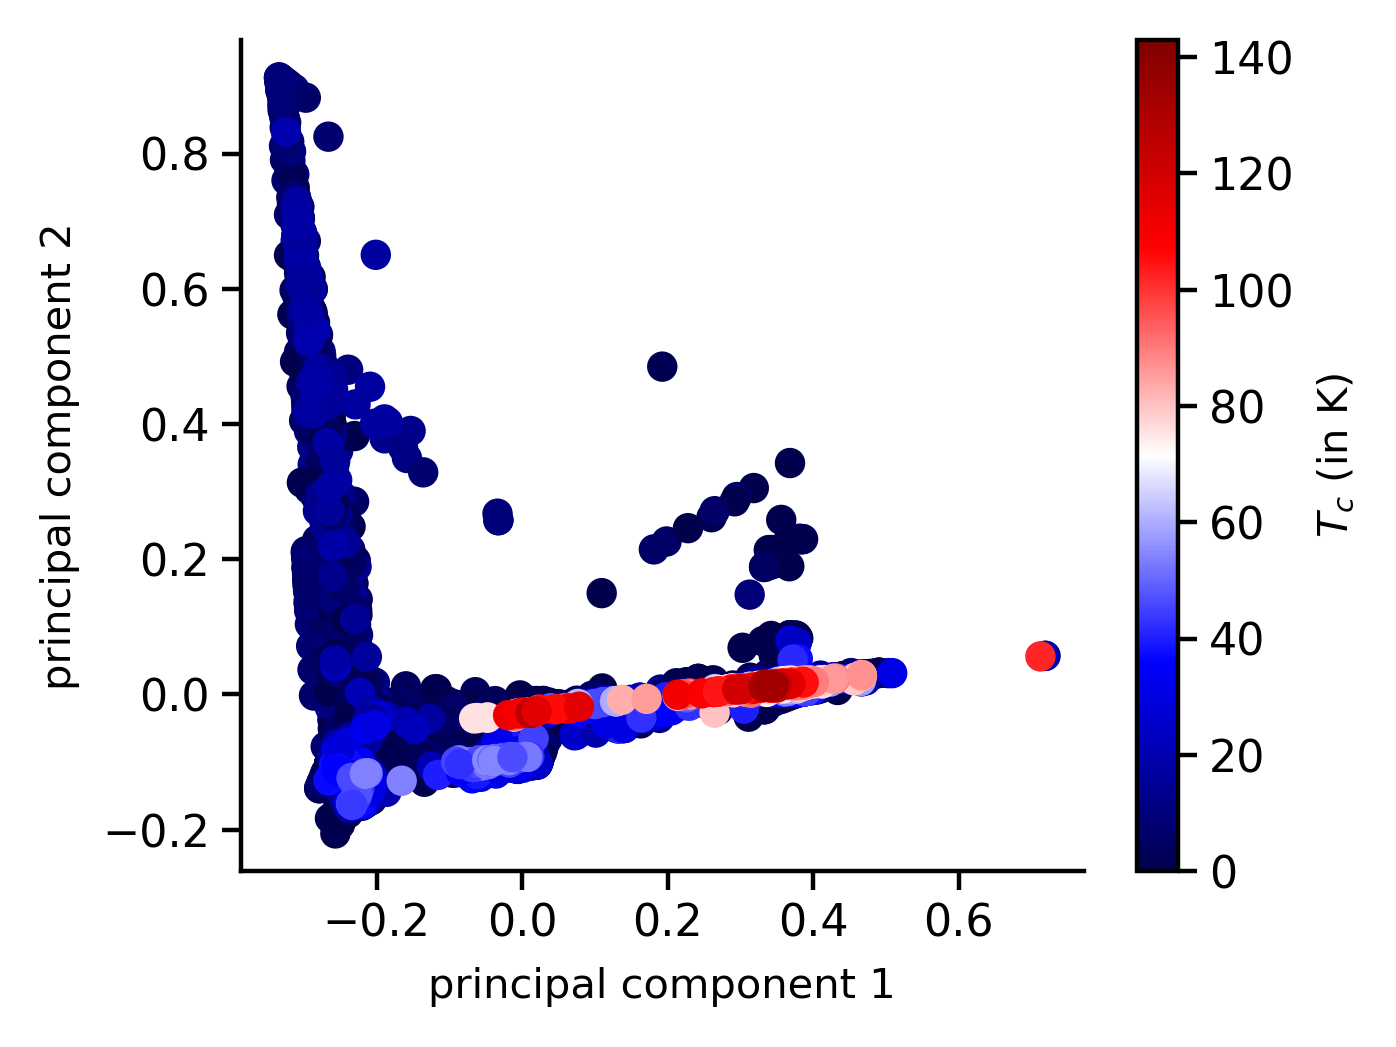

In [96]:
ph.plot_pca(pickle_name="pca/pca_no_no.pkl")

In [9]:
plot_variance_arguments = dict(
    grid=False,
    #rotation=45,
    variant=3,
    remaining_average=False,
    plot_remaining=False,#true
    plot_bars=6,#7
    plot_remaining_reduced=False
)

PCA feature #1:


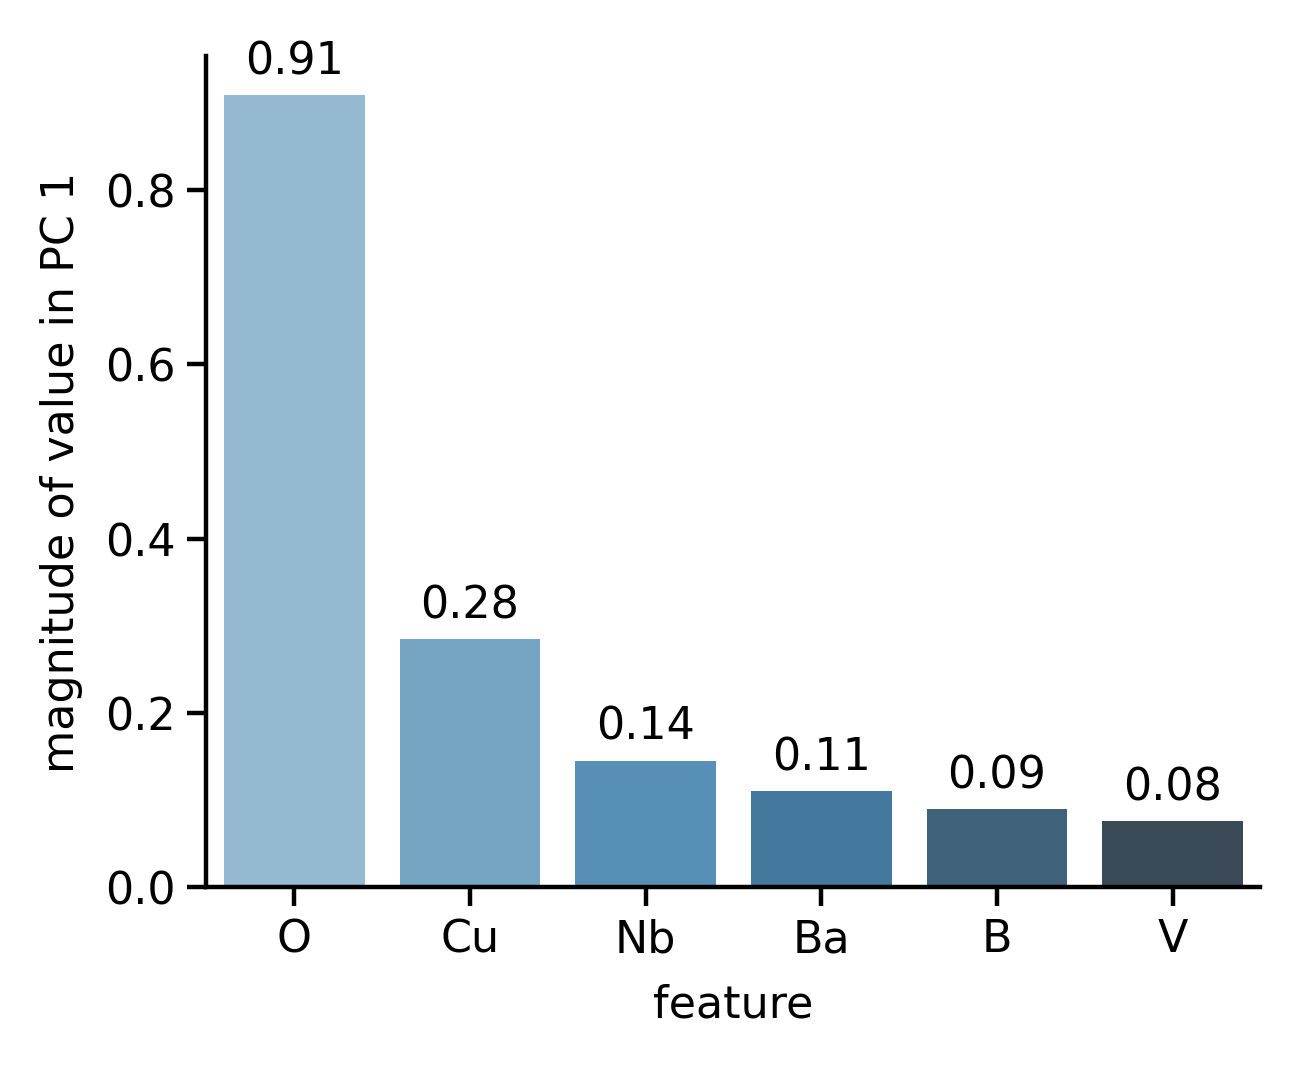

PCA feature #2:


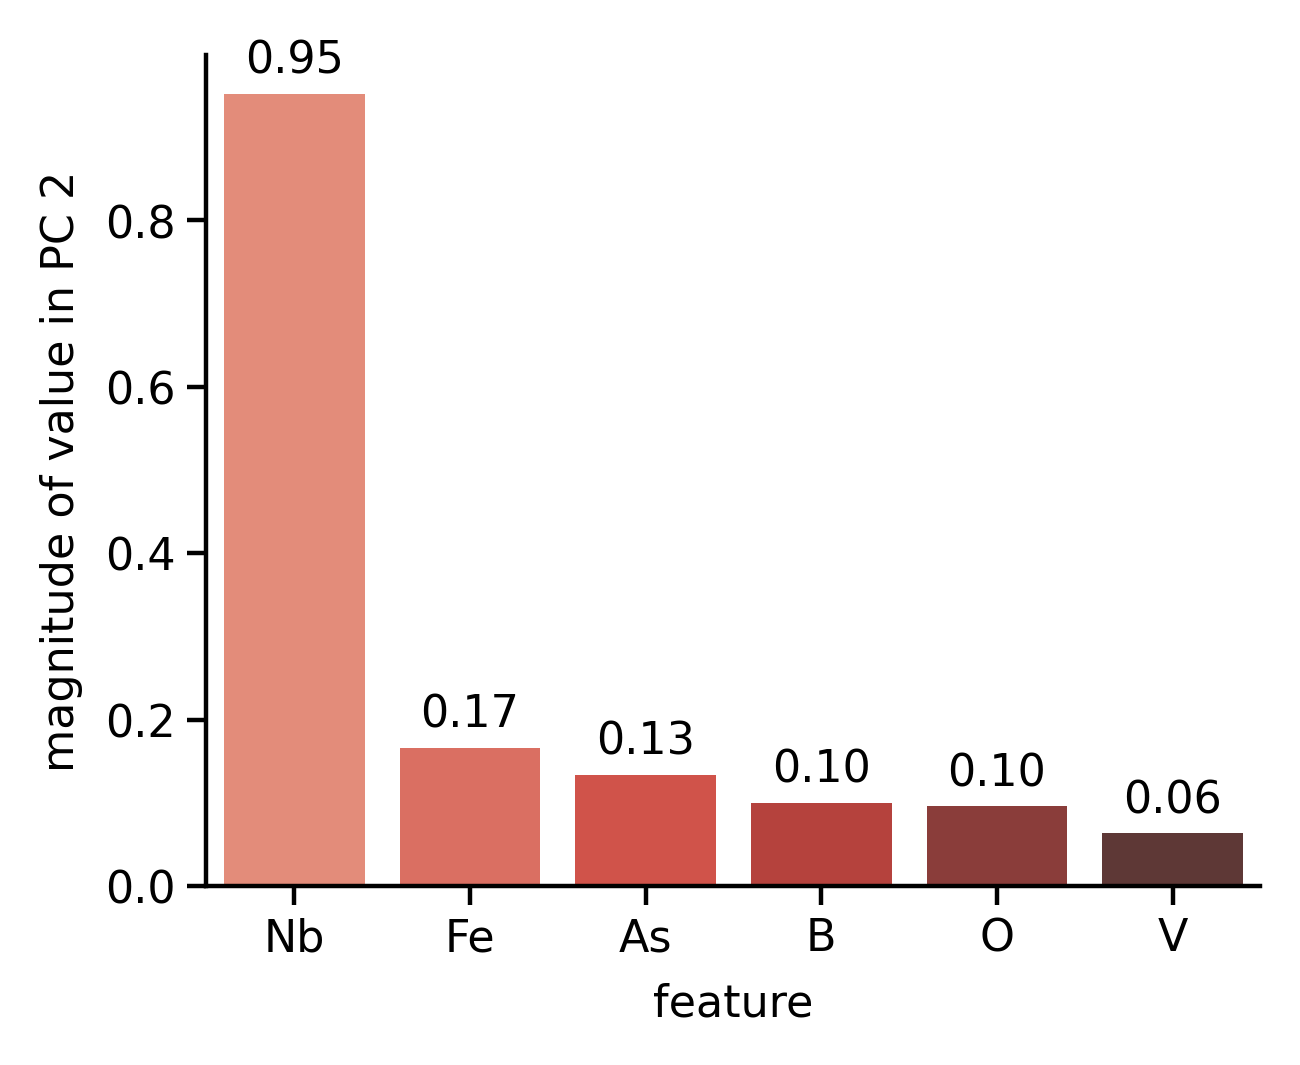

In [7]:
ph.plot_pca_variance(pickle_name="pca/pca_no_no.pkl", **plot_variance_arguments)

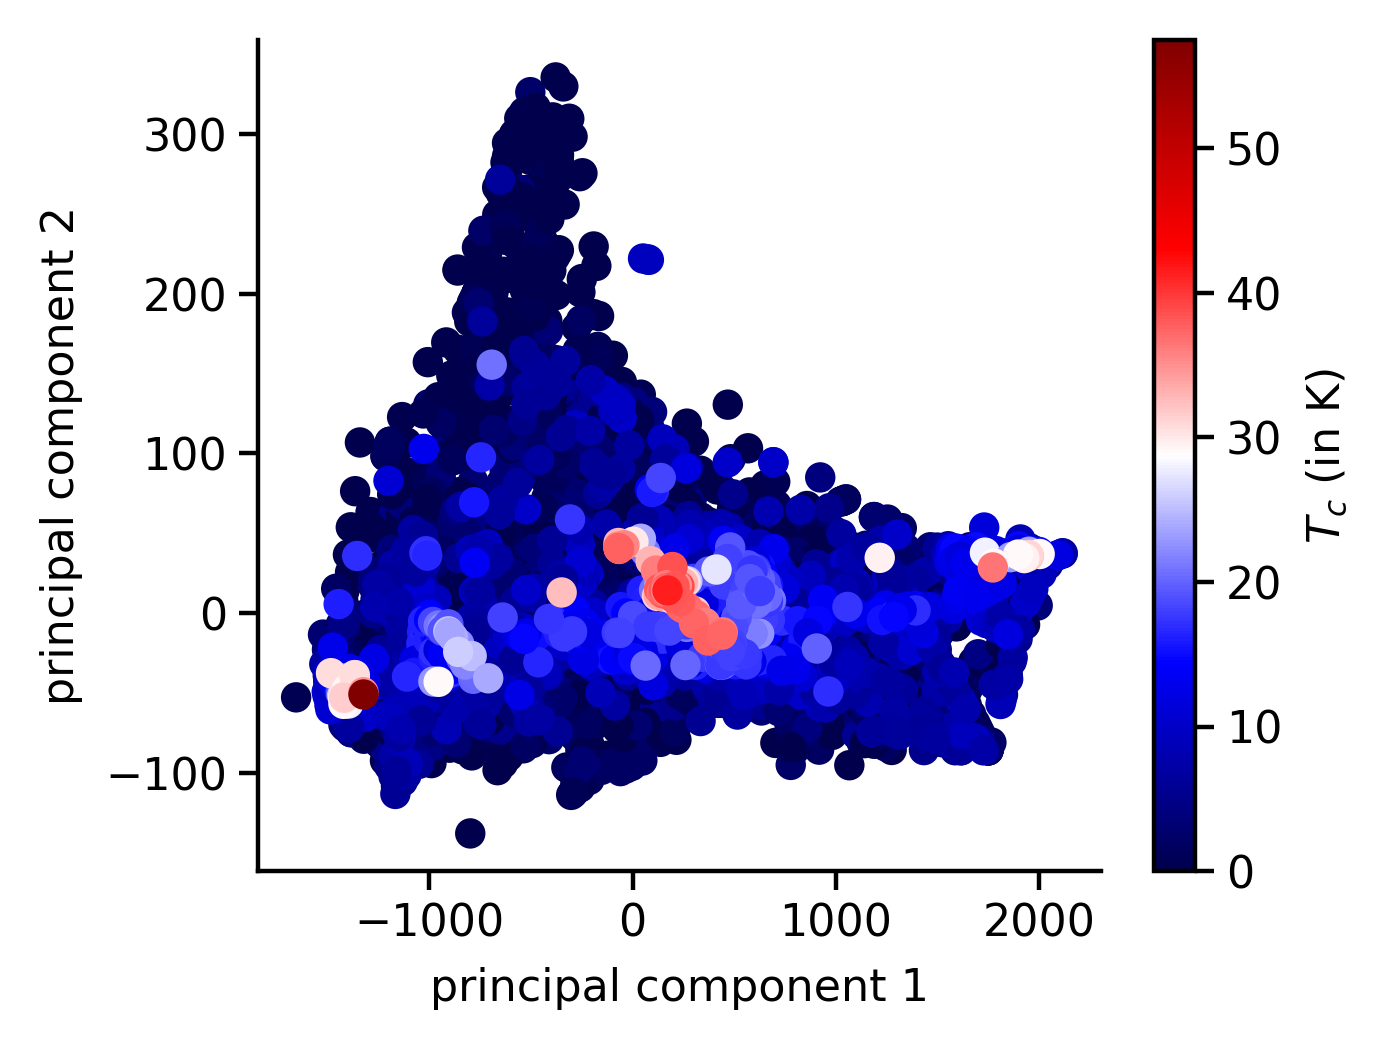

In [125]:
ph.plot_pca(pickle_name="pca/pca_min_nc.pkl")

PCA feature #1:


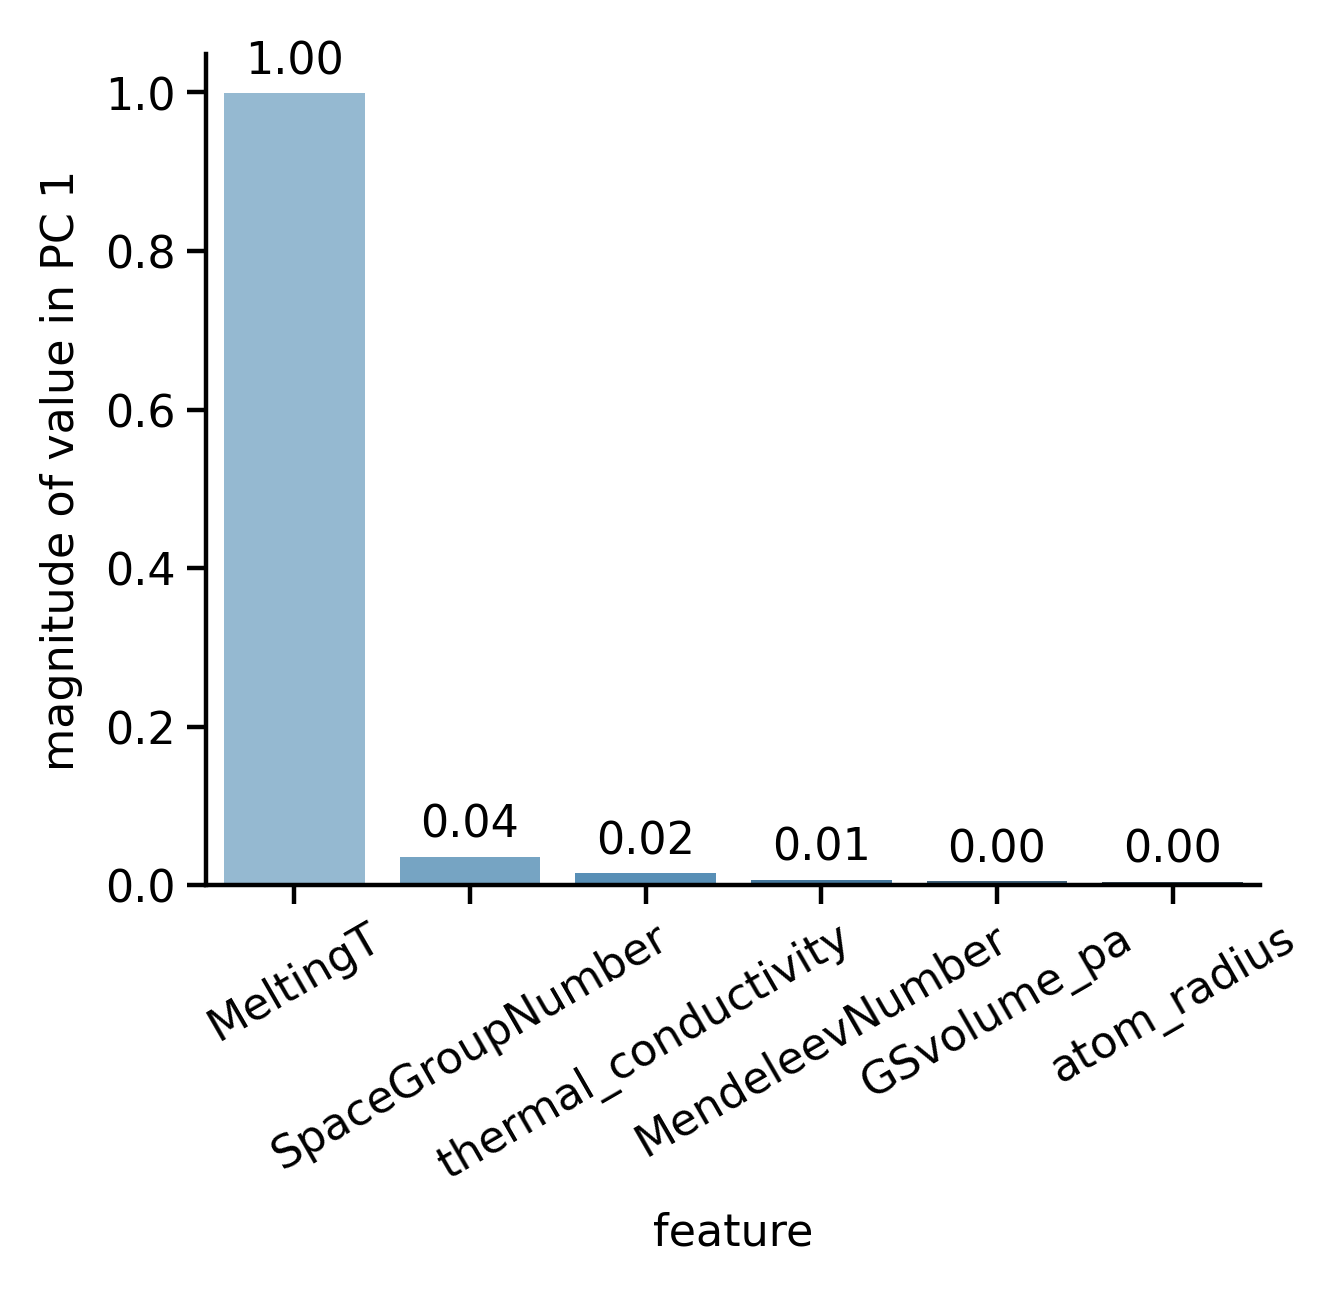

PCA feature #2:


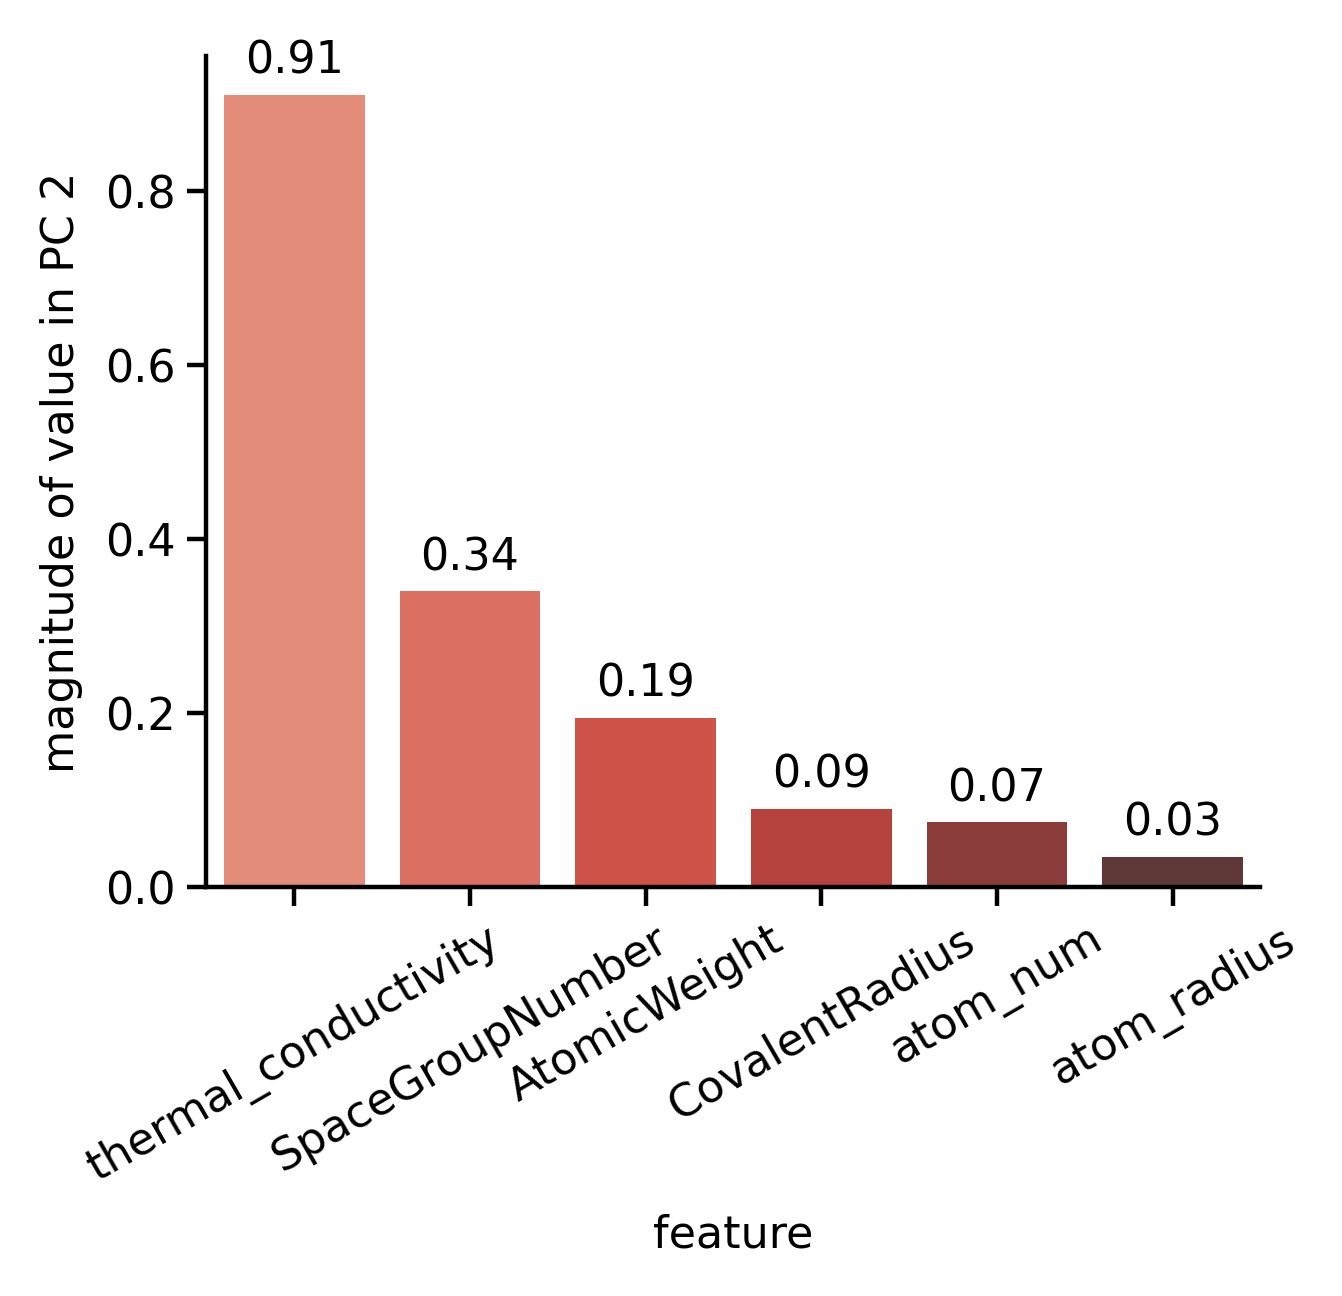

In [12]:
ph.plot_pca_variance(pickle_name="pca/pca_min_nc.pkl", rotation=30, **plot_variance_arguments)

## Distribution of critical temperatures in SuperCon database

### Calculating data

In [71]:
mlm.cT_distribution(
    cT_in_log_values=False,
    temperature_range=[0, 200],
    pickle_name="distribution/dist_no.pkl"
)

### Plotting data

In [20]:
distribution_keywords = dict(
    multiple="layer",
    alpha=0.4, 
    loc="best"
)

5548 1137 263 9325


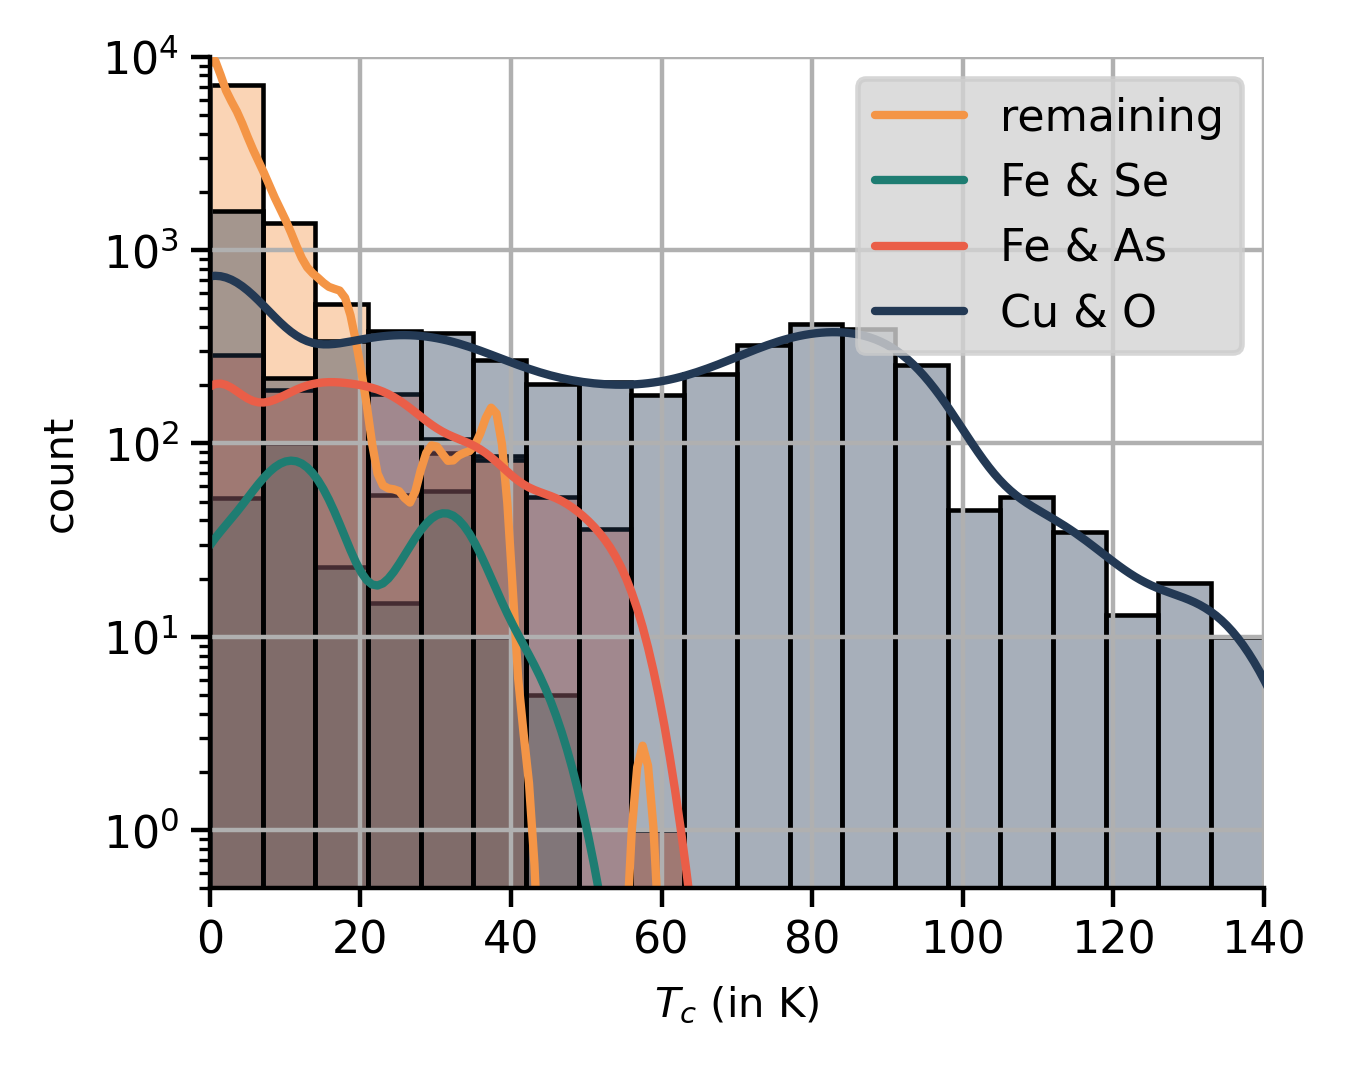

In [22]:
ph.plot_distribution(
    pickle_name="distribution/dist_no.pkl",
    manual_limit = True,
    xlim = [0, 140],
    y_scale = "log",
    binwidth = 7,
    **distribution_keywords
    )

## Machine Learning feature importance

### Calculating data

In [116]:
use_grid = mlm.RF_standard_grid
use_grid["bootstrap"] = False
use_grid["max_features"] = "sqrt"
use_grid["n_estimators"] = 400

mlfi_settings = {
    "cT_in_log_values": False,
    "set_grid": use_grid,
    "epsilon": 0.005,
    "num_for_average": 50,
    "filtering_arguments": mlm.single_no_filter,
    "with_properties": False
}

In [4]:
mlm.ML_feature_importance(
    pickle_name="ML_feat_importance/mlfi_blank_no_normal.pkl",
    **mlfi_settings
)

In [117]:
mlfi_settings["filtering_arguments"] = mlm.single_non_conventional_filter

In [14]:
mlm.ML_feature_importance(
    pickle_name="ML_feat_importance/mlfi_blank_nc_normal.pkl",
    **mlfi_settings
)

In [118]:
mlfi_settings["with_properties"] = True

In [18]:
mlm.ML_feature_importance(
    pickle_name="ML_feat_importance/mlfi_min_nc_normal.pkl",
    features = DiM.minimum_loss_features,
    **mlfi_settings
)

In [119]:
mlm.ML_feature_importance(
    pickle_name="ML_feat_importance/mlfi_sug_nc_normal.pkl",
    features = DiM.suggested_features,
    **mlfi_settings
)

### Plotting data

Average standard deviation: 0.0005708554801458547


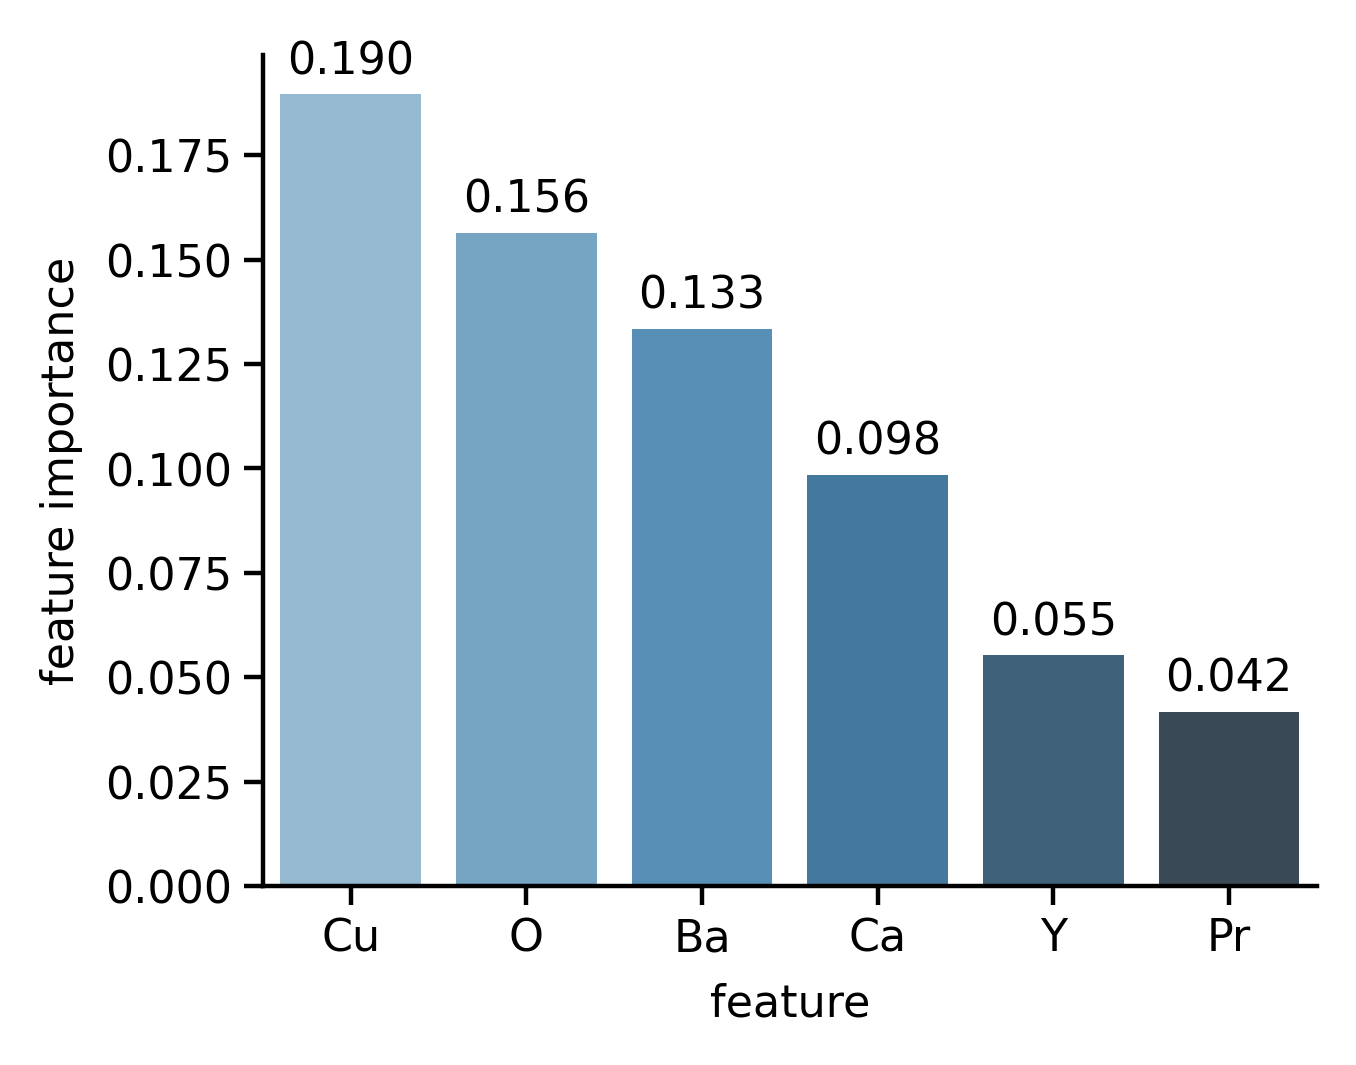

In [13]:
ph.plot_feat_importance(
    pickle_name="ML_feat_importance/mlfi_blank_no_normal.pkl",
    colormap = "Blues_d",
    rotation = 0,
    plot_remaining = False,
    plot_bars=6
)

Average standard deviation: 0.0008584595654555677


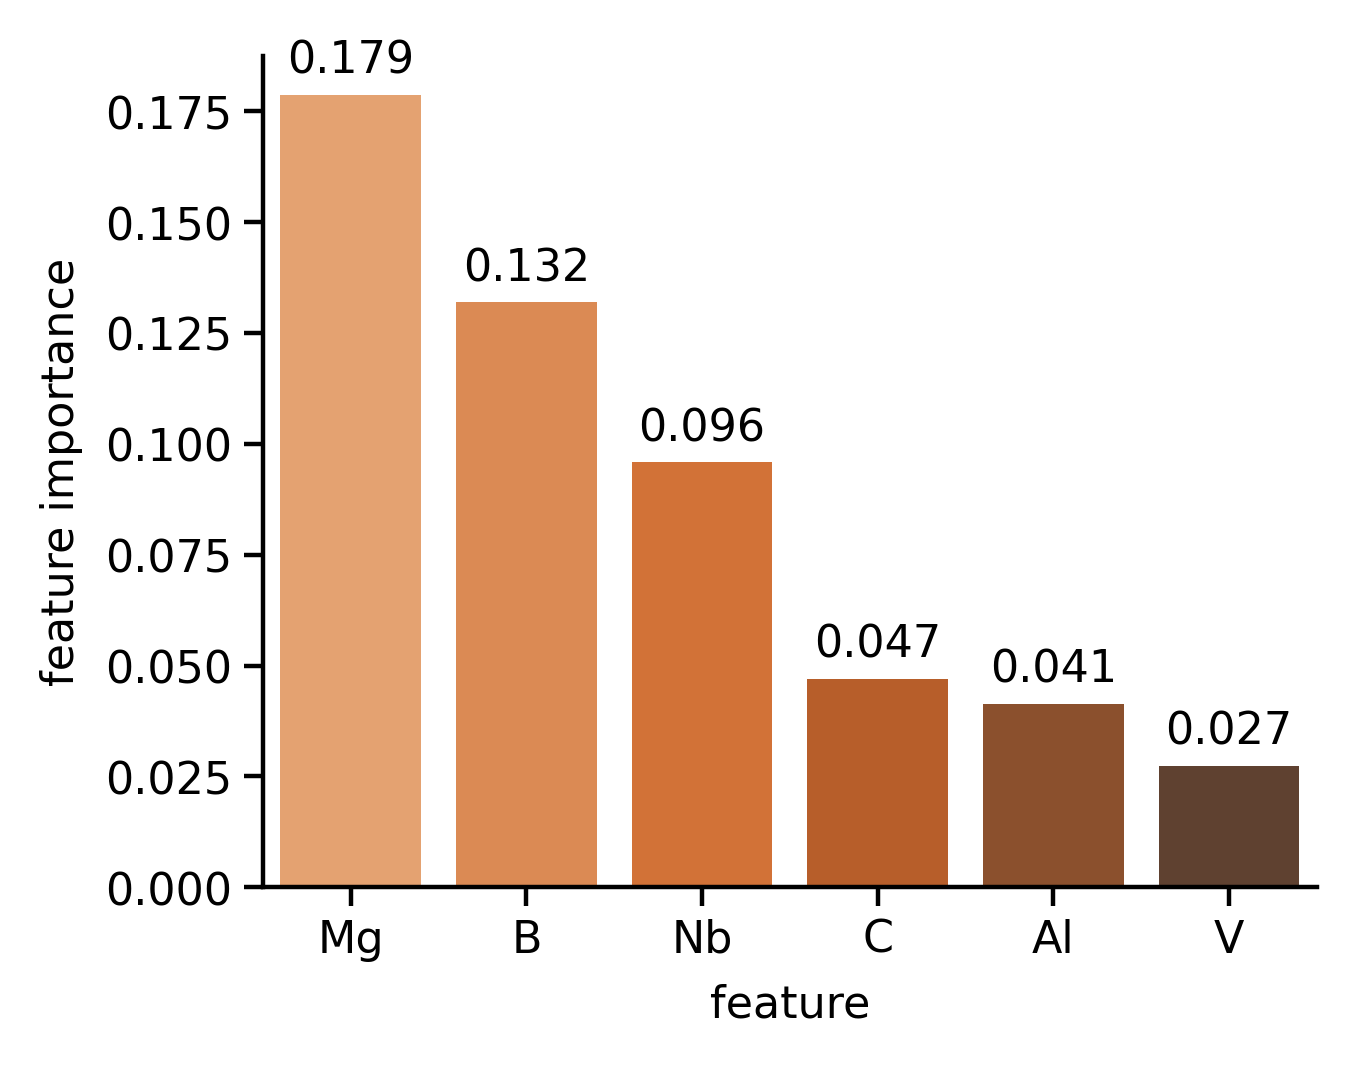

In [14]:
ph.plot_feat_importance(
    pickle_name="ML_feat_importance/mlfi_blank_nc_normal.pkl",
    colormap = "Oranges_d",
    rotation = 0,
    plot_remaining = False,
    plot_bars=6
)

Average standard deviation: 0.0006474927546789164


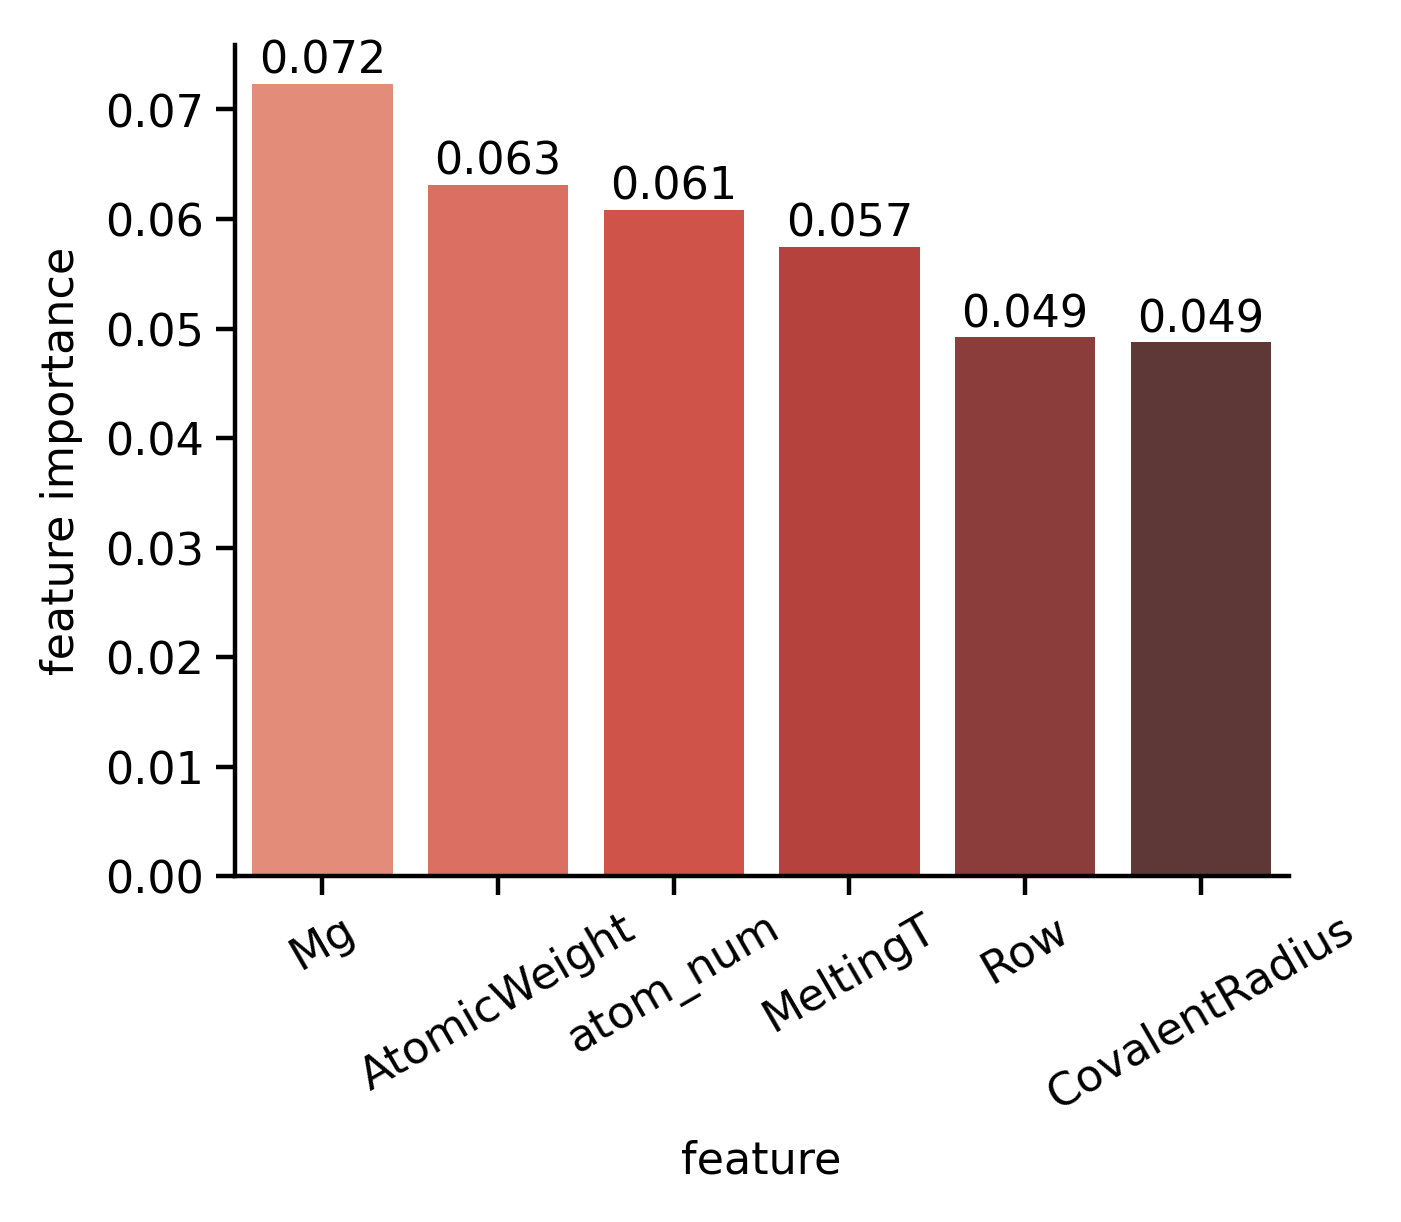

In [16]:
ph.plot_feat_importance(
    pickle_name="ML_feat_importance/mlfi_min_nc_normal.pkl",
    colormap = "Reds_d",
    rotation = 30,
    plot_remaining = False,
    plot_bars=6,
    space=0.001
)

Average standard deviation: 0.0007615882493681325


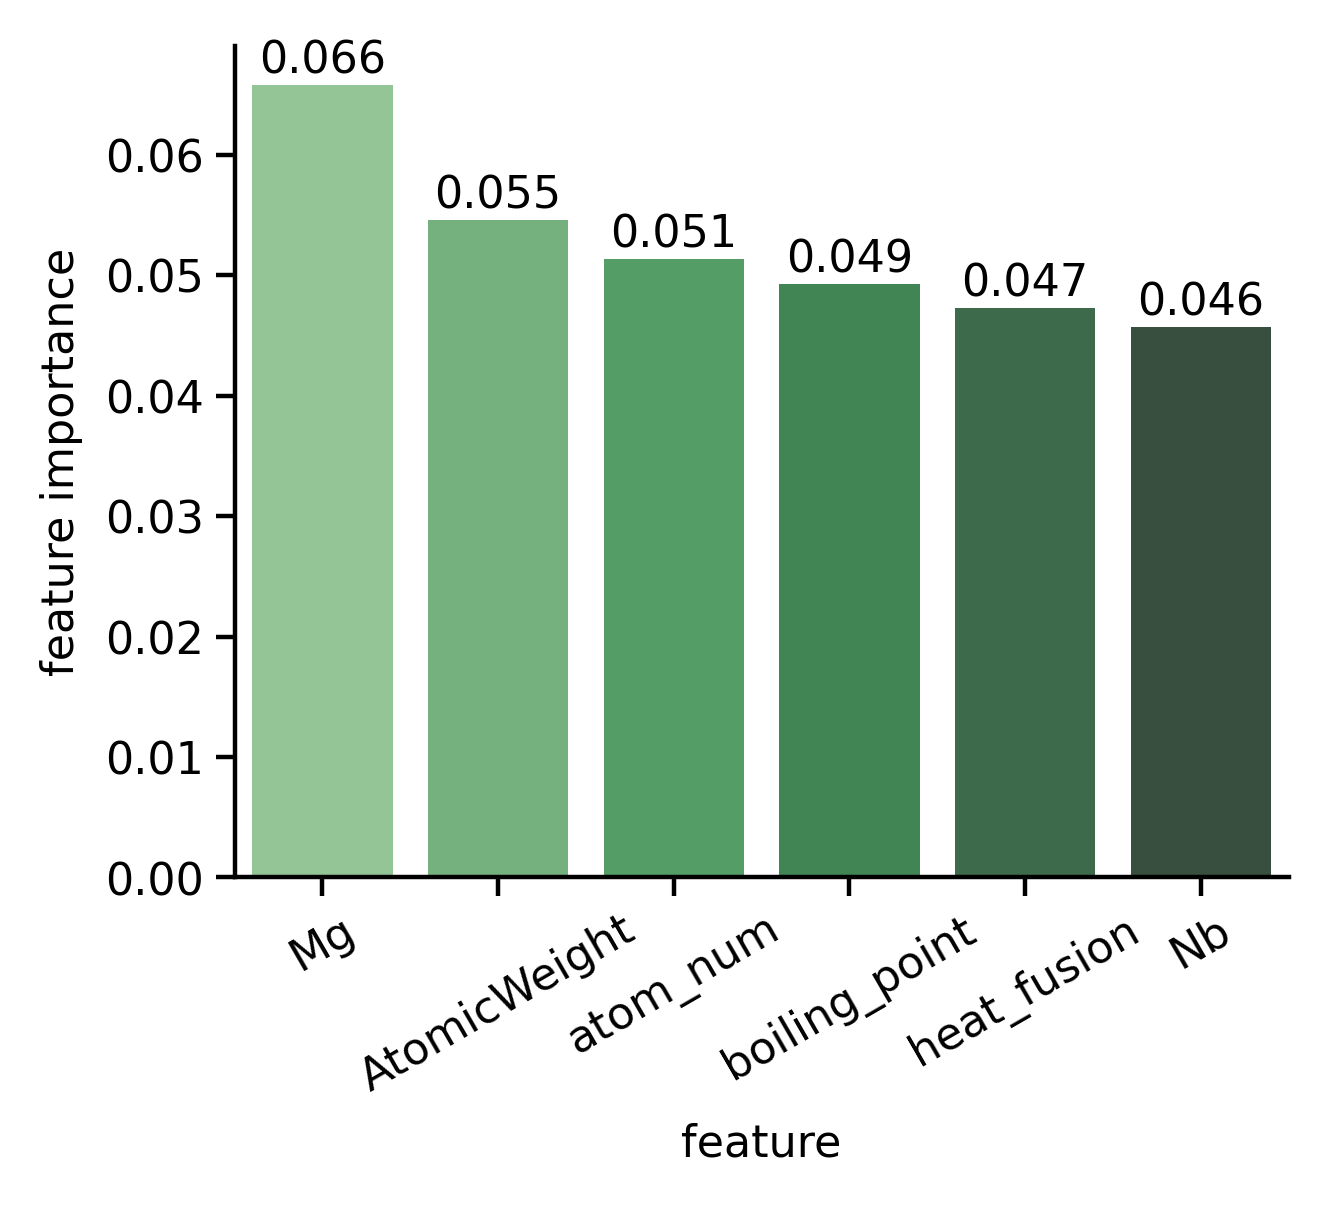

In [18]:
ph.plot_feat_importance(
    pickle_name="ML_feat_importance/mlfi_sug_nc_normal.pkl",
    colormap = "Greens_d",
    rotation = 30,
    plot_remaining = False,
    plot_bars=6,
    space=0.001
)

## Best feature candidates

### Calculating data

In [35]:
mlm.best_feature_candidates(
    pickle_name="best_features/blank.pkl",
    collect_features=["O", "Cu"],
    cT_in_log_values=False
    )

In [36]:
mlm.best_feature_candidates(
    pickle_name="best_features/blank_nc_ml.pkl",
    filtering_arguments = mlm.single_non_conventional_filter,
    collect_features=["Mg", "B", "Nb"],
    cT_in_log_values=False
    )

In [6]:
mlm.best_feature_candidates(
    pickle_name="best_features/min_all_mgb.pkl",
    filtering_arguments = mlm.single_non_conventional_filter,
    with_properties = True,
    features=DiM.minimum_loss_features,
    collect_features=["AtomicWeight", "thermal_conductivity", "Mg", "B"],
    cT_in_log_values=False)

### Plotting data

Total datapoints above 0 K: 16273
Appearance of O: 6806 (0.418)
Appearance of Cu: 5878 (0.361)


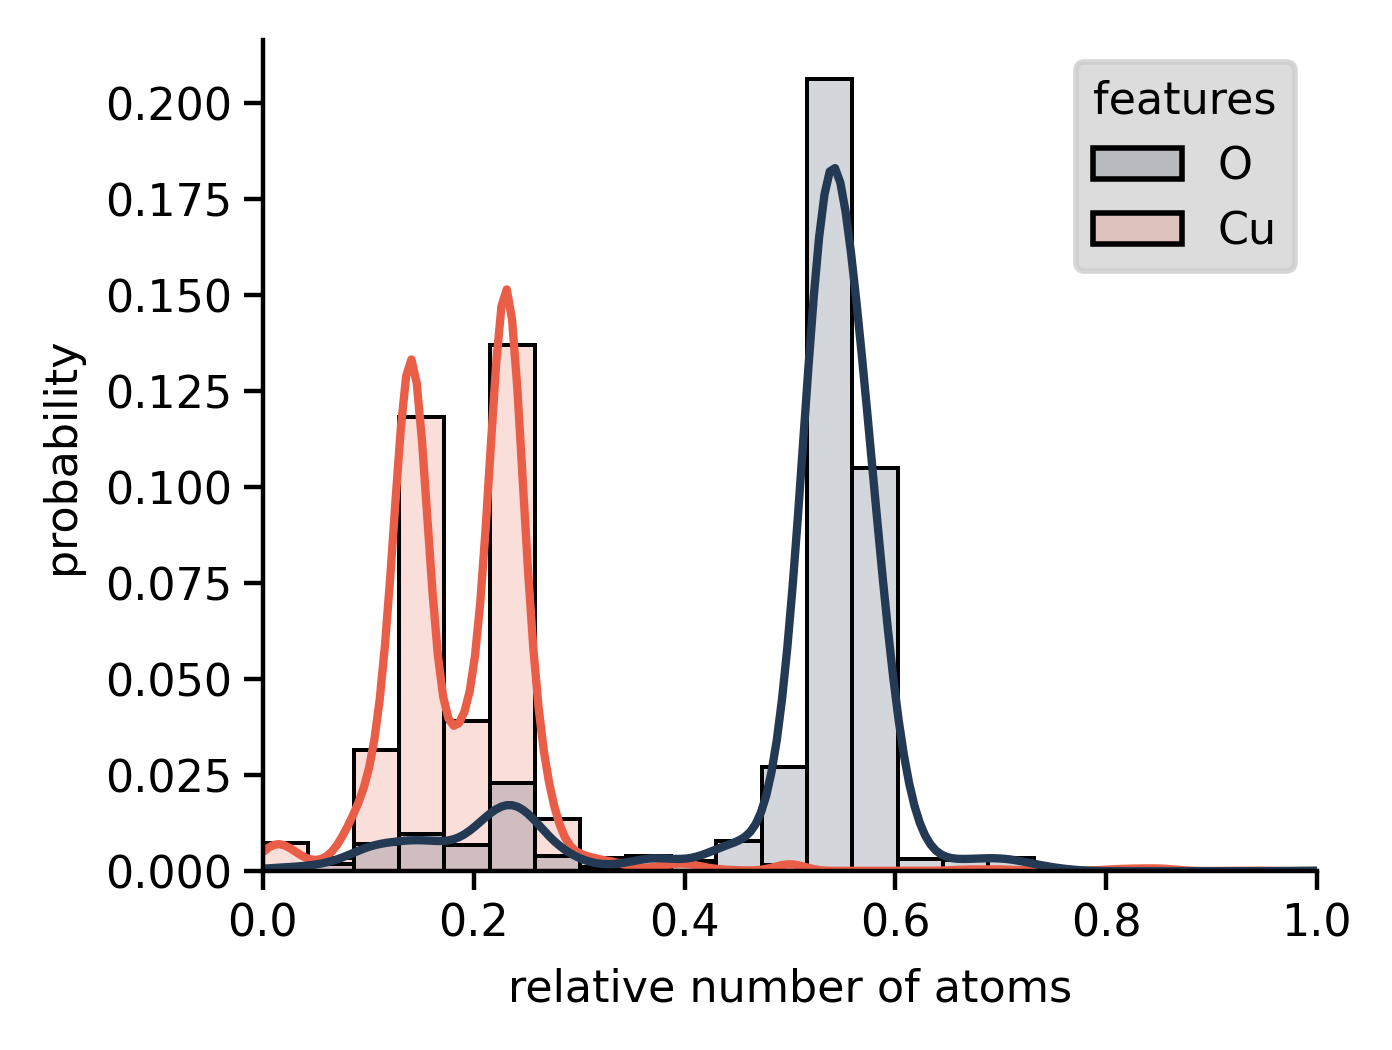

In [4]:
ax = ph.plot_best_features(
    pickle_name="best_features/blank.pkl",
    temperature_threshold=0,
    move_text_y=-0.4,
    binwidth=0.043,
    append_zeros=False,
    remove_text=True,
    alpha=0.2)
#ax.set_yscale("log")
#ax.set_ylim([1e-5,None])

Total datapoints above 60 K: 1867
Appearance of O: 1867 (1.0)
Appearance of Cu: 1867 (1.0)


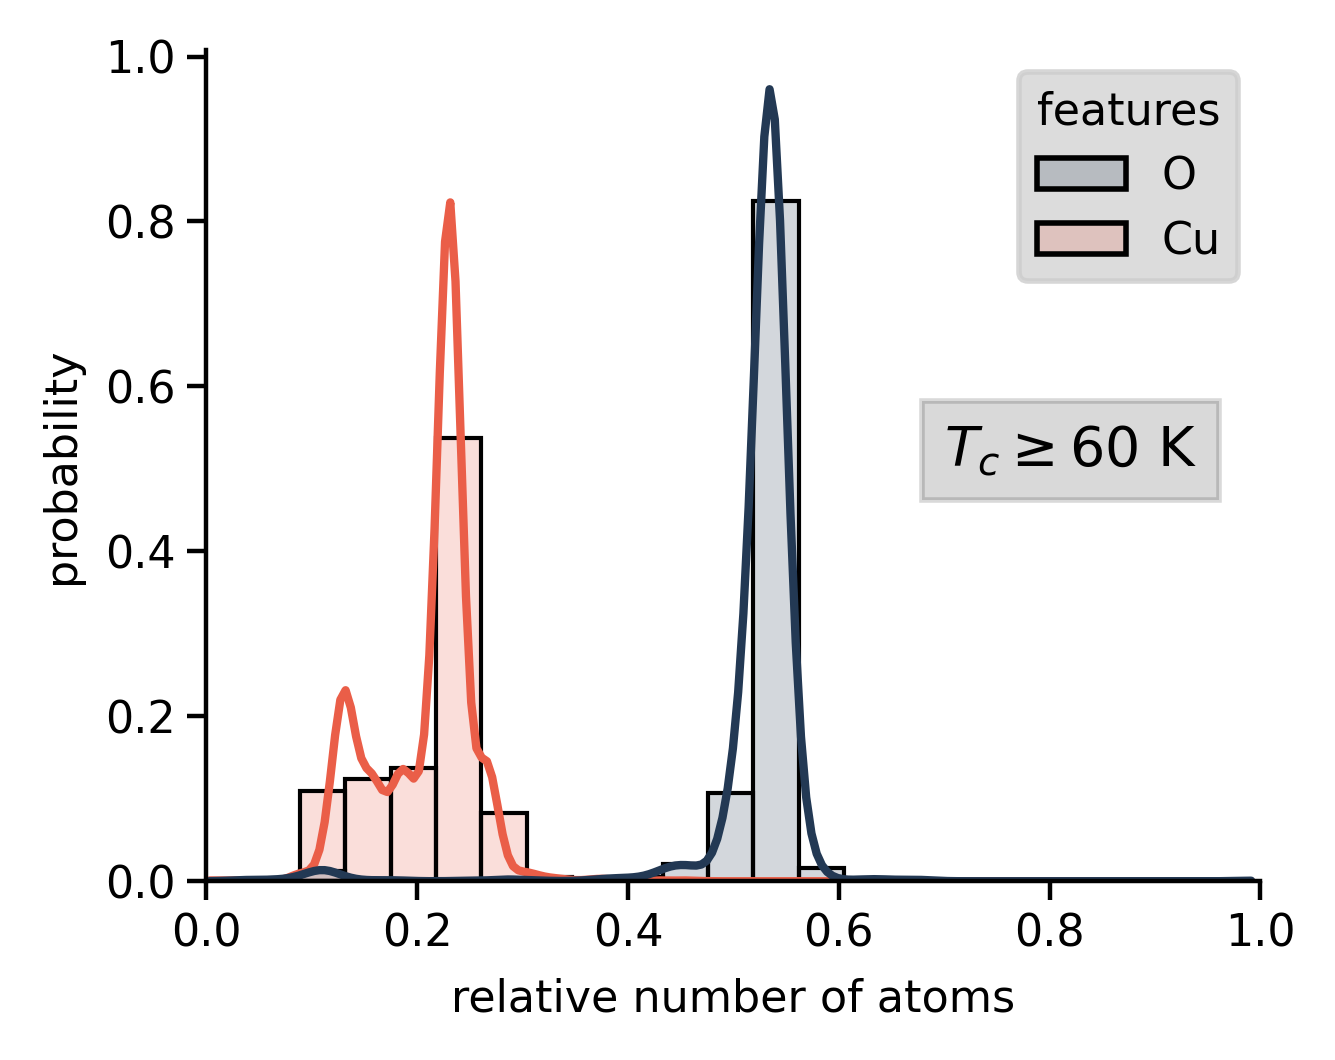

In [5]:
ax = ph.plot_best_features(
    pickle_name="best_features/blank.pkl",
    temperature_threshold=60,
    move_text_y=-0.4,
    append_zeros=False,
    binwidth=0.043,
    alpha=0.2)
#ax.set_ylim([None,1])

Total datapoints above 0 K: 9325
Appearance of Mg: 313 (0.034)
Appearance of B: 1073 (0.115)
Appearance of Nb: 1263 (0.135)


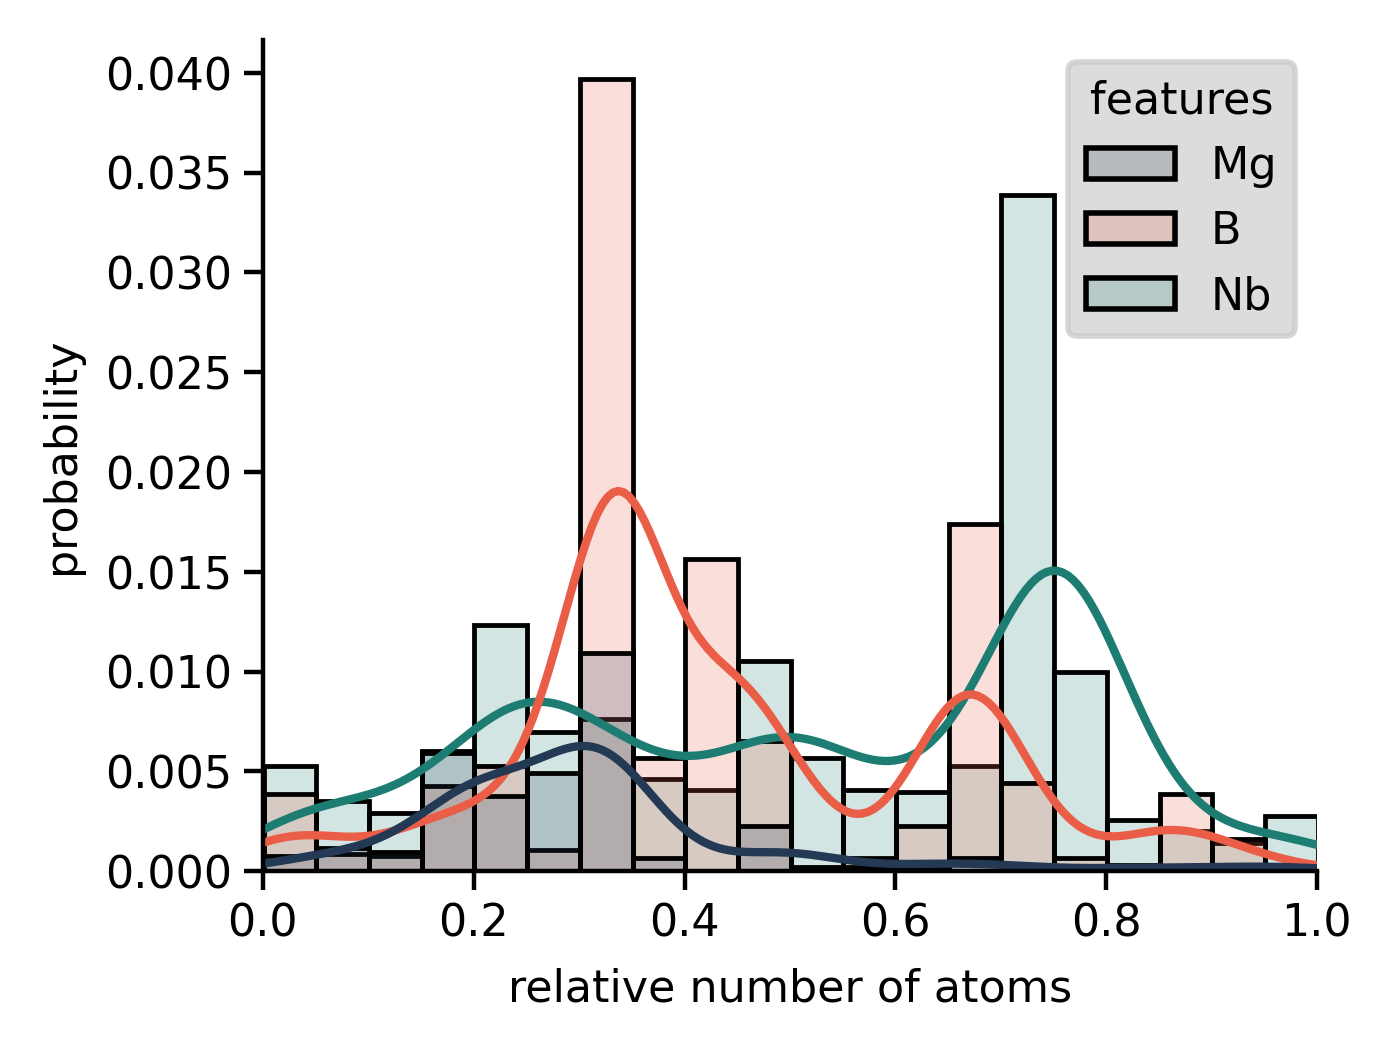

In [6]:
ax = ph.plot_best_features(
    pickle_name="best_features/blank_nc_ml.pkl",
    append_zeros=False,
    temperature_threshold=0,
    move_text_y=-0.4,
    remove_text=True,
    alpha=0.2)

Total datapoints above 18 K: 378
Appearance of Mg: 155 (0.41)
Appearance of B: 161 (0.426)
Appearance of Nb: 127 (0.336)


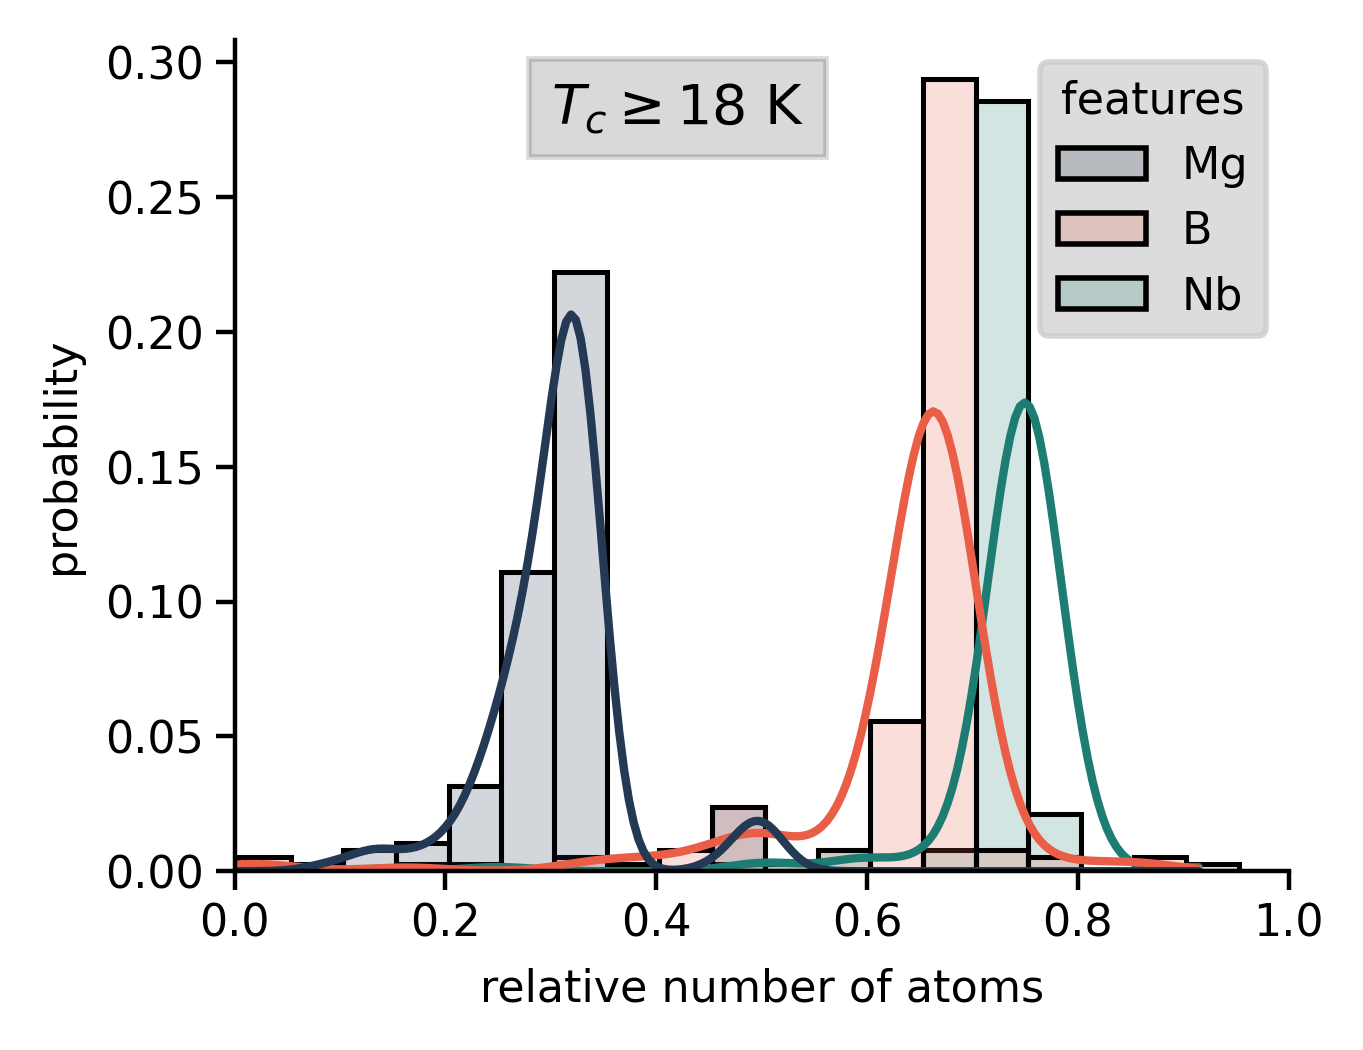

In [7]:
ax = ph.plot_best_features(
    pickle_name="best_features/blank_nc_ml.pkl",
    append_zeros=False,
    temperature_threshold=18,
    move_text_x=-0.4,
    alpha=0.2)

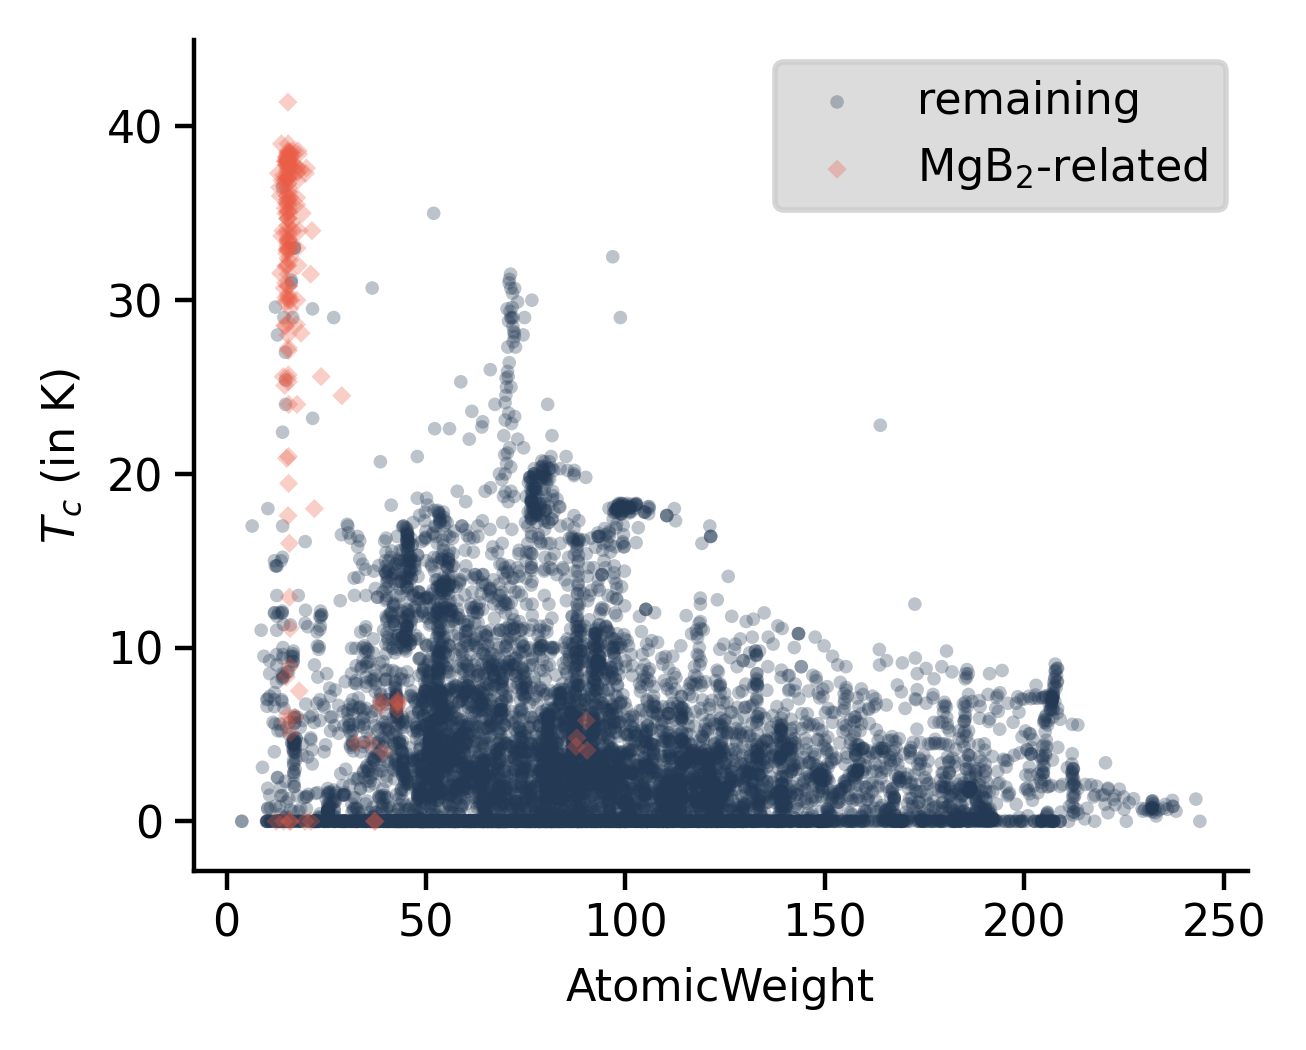

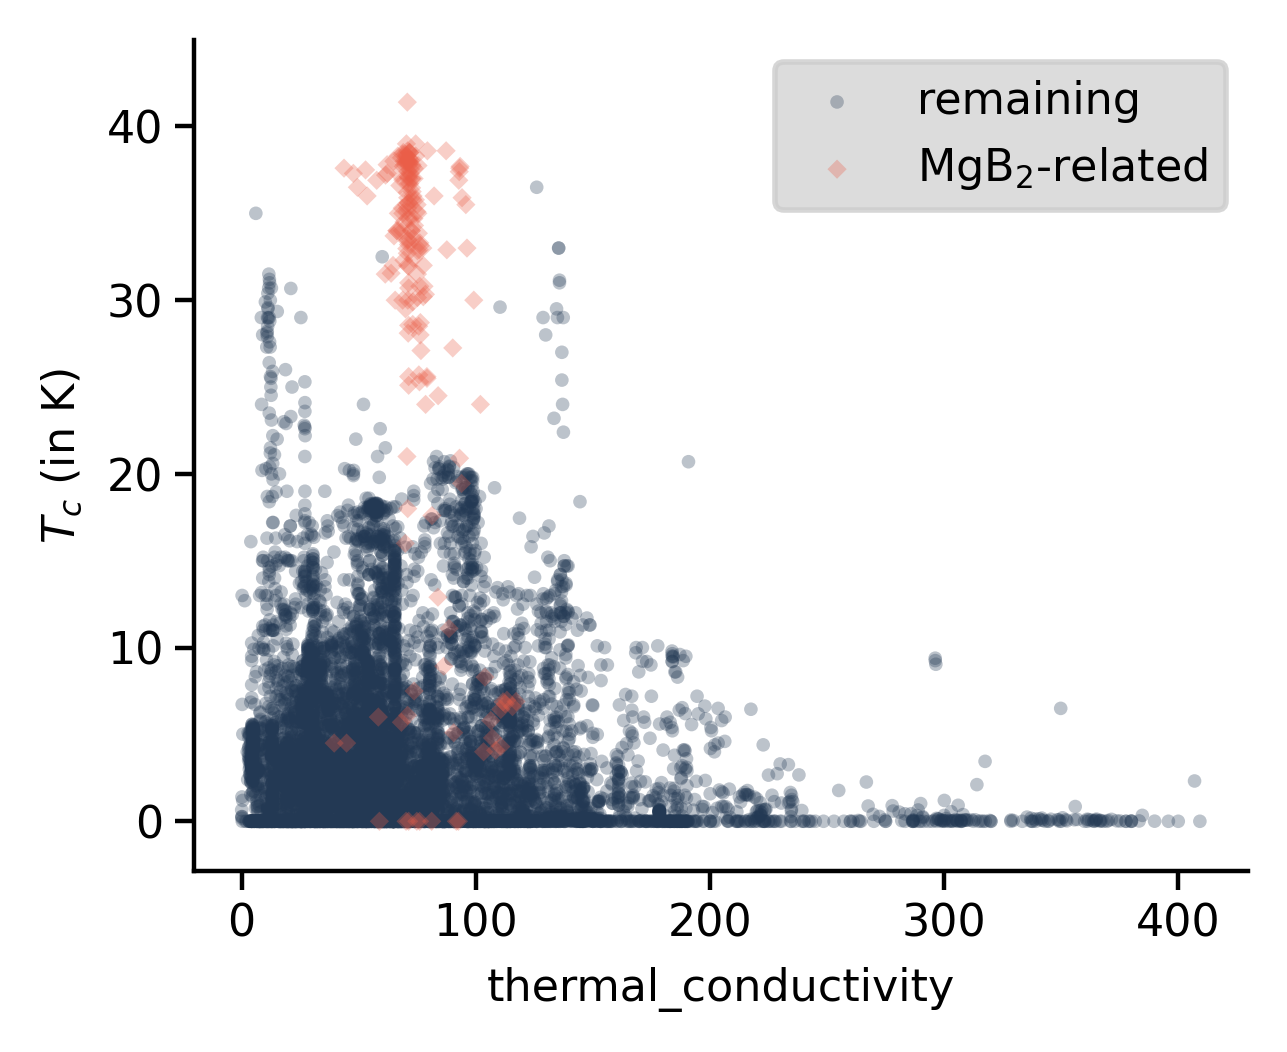

In [7]:
ph.plot_best_features_temperature(
    pickle_name="best_features/min_all_mgb.pkl",
    alpha=0.3,
    mgb2=True)

# Regressor evaluation

## Hyperparameter visualisation

### Calculating data

In [10]:
use_grid = mlm.RF_standard_grid
new_arguments = {
    "bootstrap": True,
    "max_features": "sqrt",
}
for key in new_arguments:
    use_grid[key] = new_arguments[key]

max_samples_values = [0.001, 0.005, 0.02, 0.08]
max_samples_values1 = np.linspace(0.12, 1, num=6)
for i in max_samples_values1:
    max_samples_values.append(i)

max_depth_values_float = np.linspace(24, 150, num=8)
max_depth_values = [1, 2, 4, 8, 16]
for l in max_depth_values_float:
    max_depth_values.append(int(l))

max_features_values = np.linspace(0.001, 1.0, num=11)

search_grid = {
    "max_samples": max_samples_values,
    "max_depth": max_depth_values,
    "max_features": max_features_values
}

mlm.continuous_hp_evaluation(search_grid, set_grid=use_grid, num_for_average=100, pickle_name="hp_visualize/bootstrap.pkl")

In [3]:
n_estimator_float = np.linspace(150, 500, num=5)
n_estimator_values = [1, 5, 10, 20, 50, 100]
for l in n_estimator_float:
    n_estimator_values.append(int(l))

search_grid = {"n_estimators" : n_estimator_values}

mlm.continuous_hp_evaluation(
    search_grid, 
    num_for_average=100, 
    pickle_name="hp_visualize/n_estimators.pkl"
    )

### Plotting data

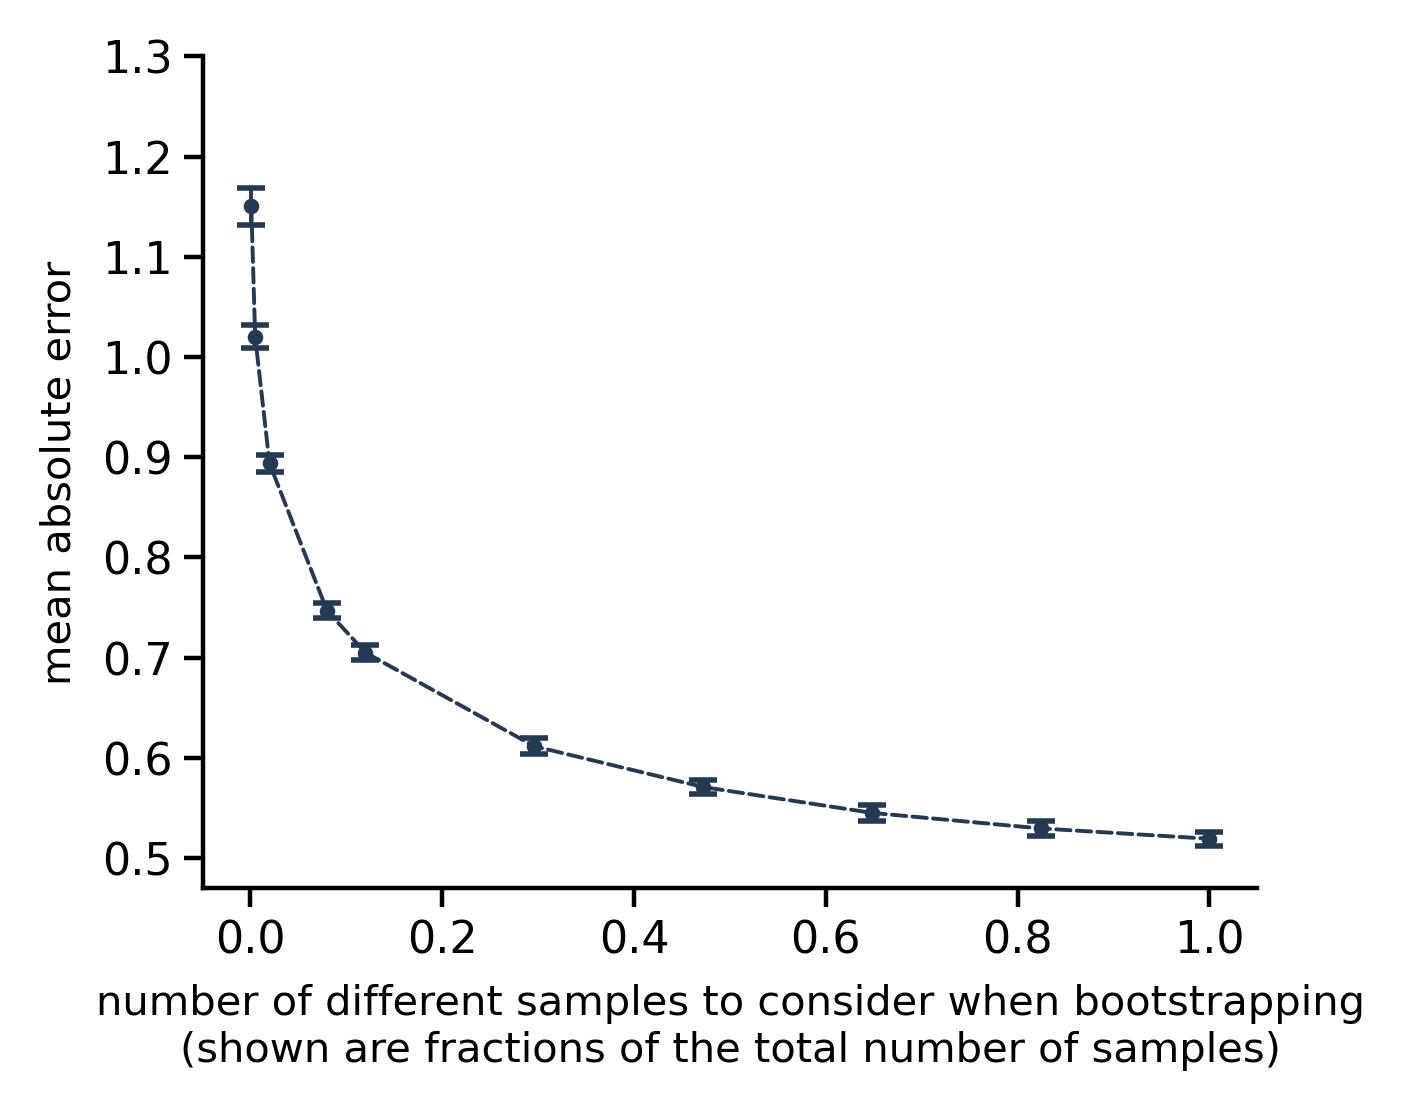

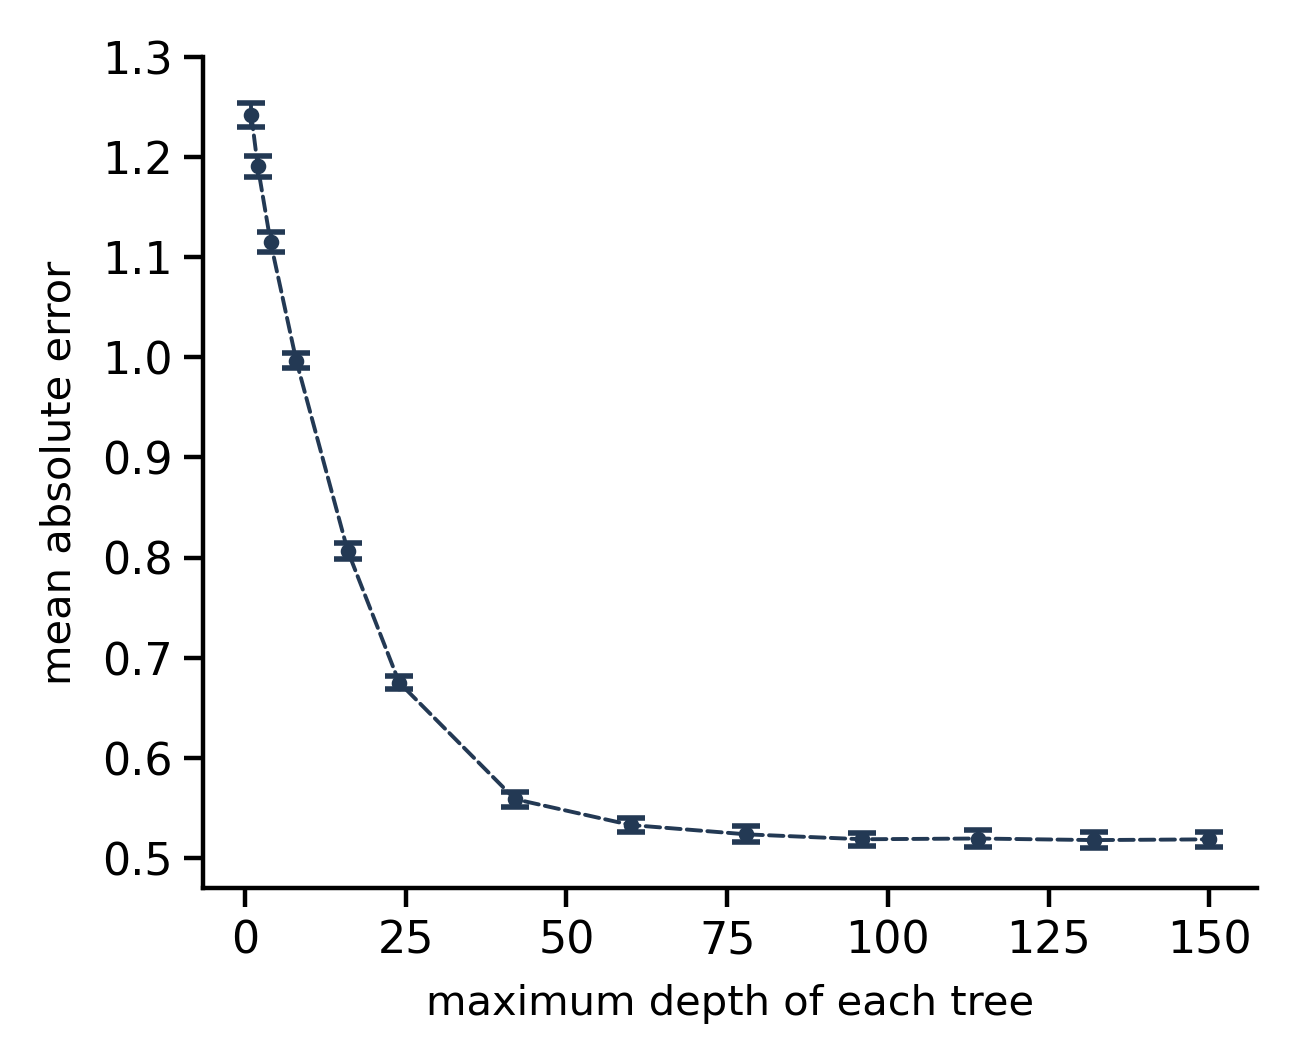

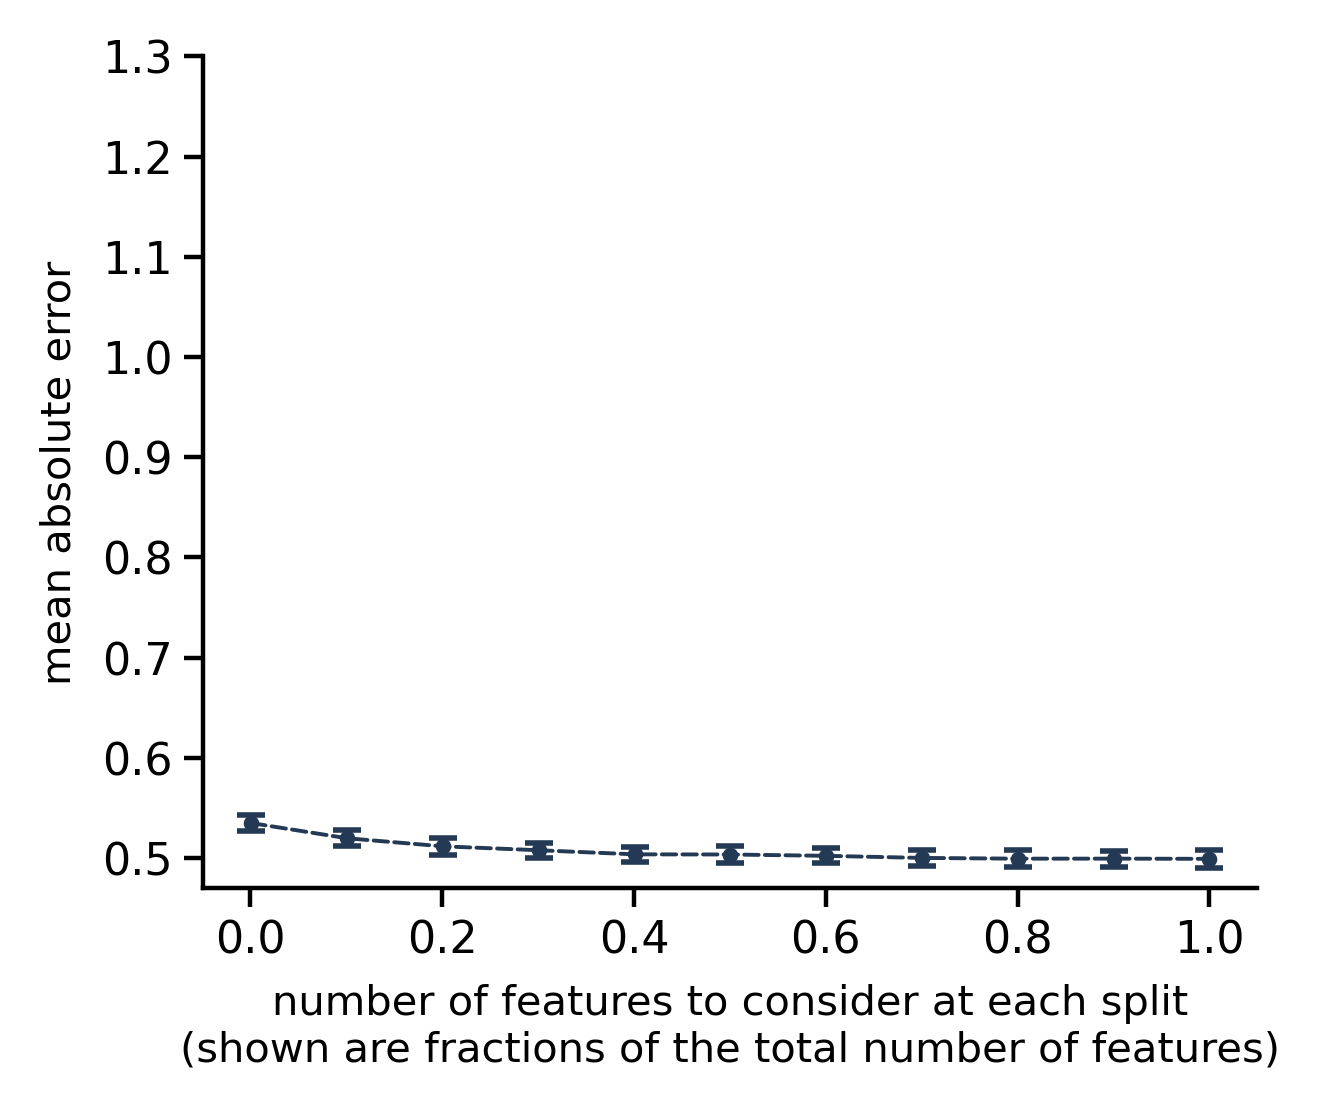

In [45]:
ph.plot_continuous_hp(
    pickle_name="hp_visualize/bootstrap.pkl", 
    markersize=1.8, 
    linewidth=0.7,
    manual_limit = True,
    x_names = ["number of different samples to consider when bootstrapping\n(shown are fractions of the total number of samples)", 
    "maximum depth of each tree", 
    "number of features to consider at each split\n(shown are fractions of the total number of features)"]
    )

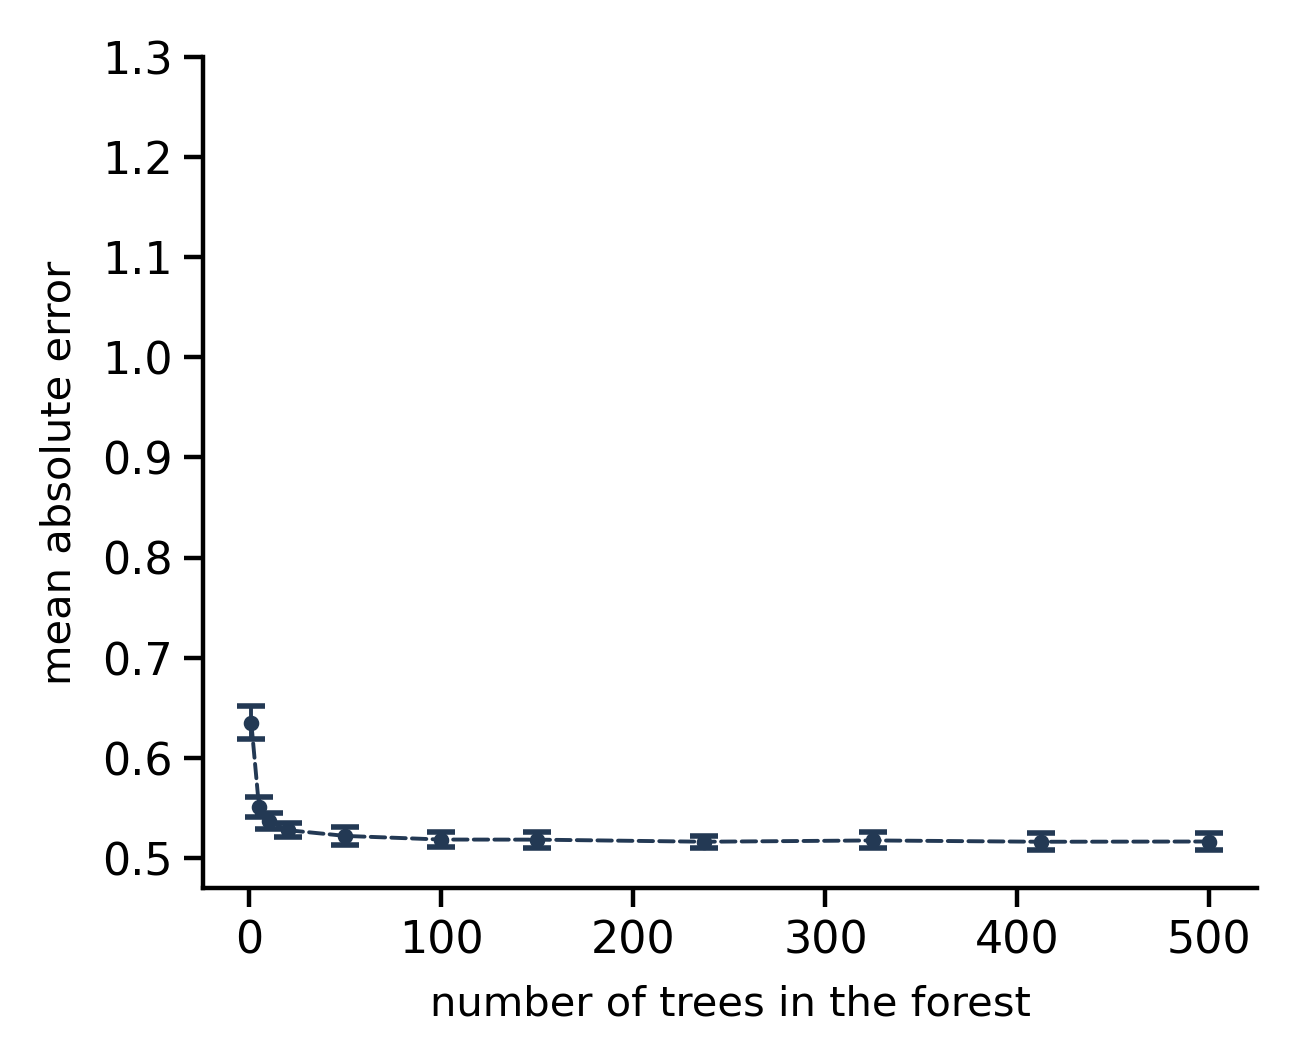

In [43]:
ph.plot_continuous_hp(
    pickle_name="hp_visualize/n_estimators.pkl", 
    markersize=1.8, 
    linewidth=0.7,
    manual_limit=True,
    x_names=["number of trees in the forest"]
    )

## Hyperparameter tuning

In [9]:
use_grid = mlm.RF_standard_grid
use_grid["n_estimators"] = 400

max_features = [1.0, "sqrt", "log2"]
bootstrap = [True, False]
search_grid = {"max_features": max_features, 'bootstrap': bootstrap}
    
hp_tune_settings = {
    "search_grid": search_grid,
    "set_grid": use_grid,
    "print_results_to_console": True,
    "num_for_average": 100,
    "with_properties": False,
    "epsilon": 0.005,
    "filtering_arguments": mlm.single_non_conventional_filter,
    "cT_in_log_values": False
}

In [ ]:
mlm.hyperparameter_tuning(
    pickle_name="hp_settings/hp_tune_blank_nc_normal.pkl",
    **hp_tune_settings
    )
#1-40

In [ ]:
hp_tune_settings["with_properties"] = True

In [ ]:
mlm.hyperparameter_tuning(
    pickle_name="hp_settings/hp_tune_min_nc_normal.pkl", 
    features = DiM.minimum_loss_features,
    **hp_tune_settings
    )

In [ ]:
mlm.hyperparameter_tuning(
    pickle_name="hp_settings/hp_tune_sug_nc_normal.pkl", 
    features = DiM.suggested_features,
    **hp_tune_settings
    )

## Accuracy depending on size of training set

### Calculating data

In [143]:
use_grid_oob = mlm.RF_standard_grid
use_grid_oob["n_estimators"] = 400
use_grid_oob["bootstrap"] = True
use_grid_oob["max_features"] = "sqrt"
use_grid_oob["oob_score"] = True

use_grid = mlm.RF_standard_grid
use_grid["n_estimators"] = 400
use_grid["max_features"] = "sqrt"
use_grid["bootstrap"] = False
use_grid["oob_score"] = False

acc_size_settings = {
    "num_cal_for_average": 10,
    "num_for_average": 10,
    "filtering_arguments": mlm.single_non_conventional_filter,
    "set_grid": use_grid,
    "cT_in_log_values": False,
    "with_properties": False,
    "epsilon": 0.005
}

In [ ]:
mlm.accuracy_training_size(
    pickle_name = "accuracy_size/ats_blank_nc_normal.pkl",
    **acc_size_settings
    )

In [144]:
acc_size_settings["with_properties"] = True

In [ ]:
mlm.accuracy_training_size(
    pickle_name = "accuracy_size/ats_min_nc_normal.pkl",
    features = DiM.minimum_loss_features,
    **acc_size_settings
    )

In [145]:
mlm.accuracy_training_size(
    pickle_name = "accuracy_size/ats_sug_nc_normal.pkl",
    features = DiM.suggested_features,
    **acc_size_settings
    )

### Plotting data

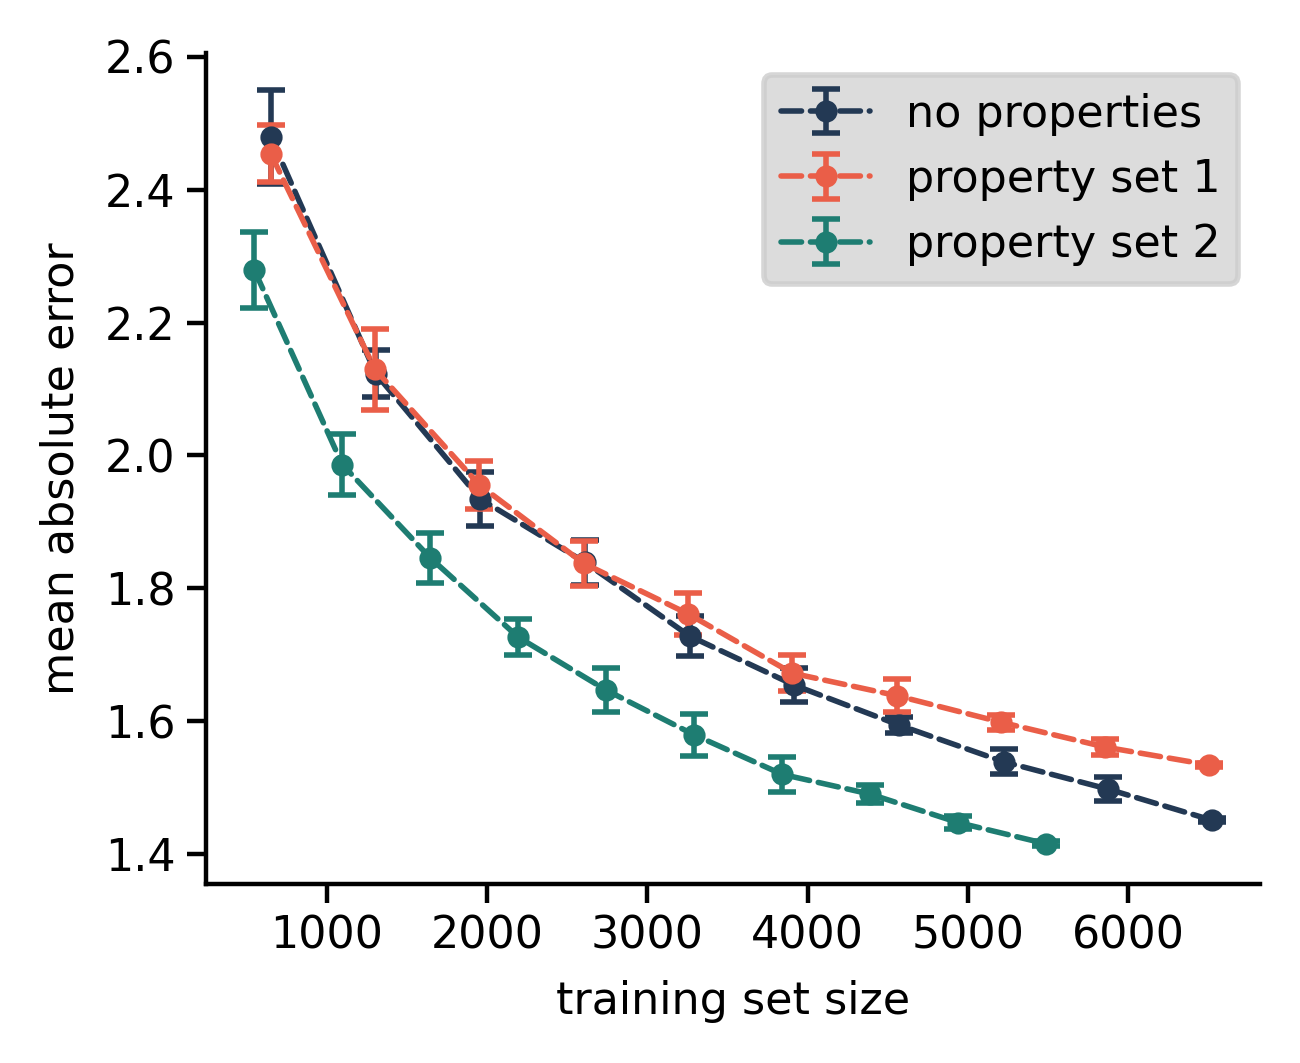

In [146]:
ph.plot_accuracy_training_size(
    pickle_names=[
        "accuracy_size/ats_blank_nc_normal.pkl",
        "accuracy_size/ats_min_nc_normal.pkl", 
        "accuracy_size/ats_sug_nc_normal.pkl"
    ],
    linewidth=1, 
    markersize=3,
    label = ["no properties", "property set 1", "property set 2"]
)

## Visualization of Accuracy - predicted/actual plot

### Calculating data

In [ ]:
with open("Pickle_data/hp_settings/hp_tune_blank_nc_normal.pkl", "rb") as fid:
    data_loaded = pickle.load(fid)

mlm.predicted_actual(
    pickle_name="predicted_actual/pa_blank_nc_normal.pkl",
    num_for_average = 100,
    **data_loaded
    )

### Plotting data

Inside tube: 1932
Outside tube: 865
All datapoints: 2797
69.07 % of datapoints are inside error bar


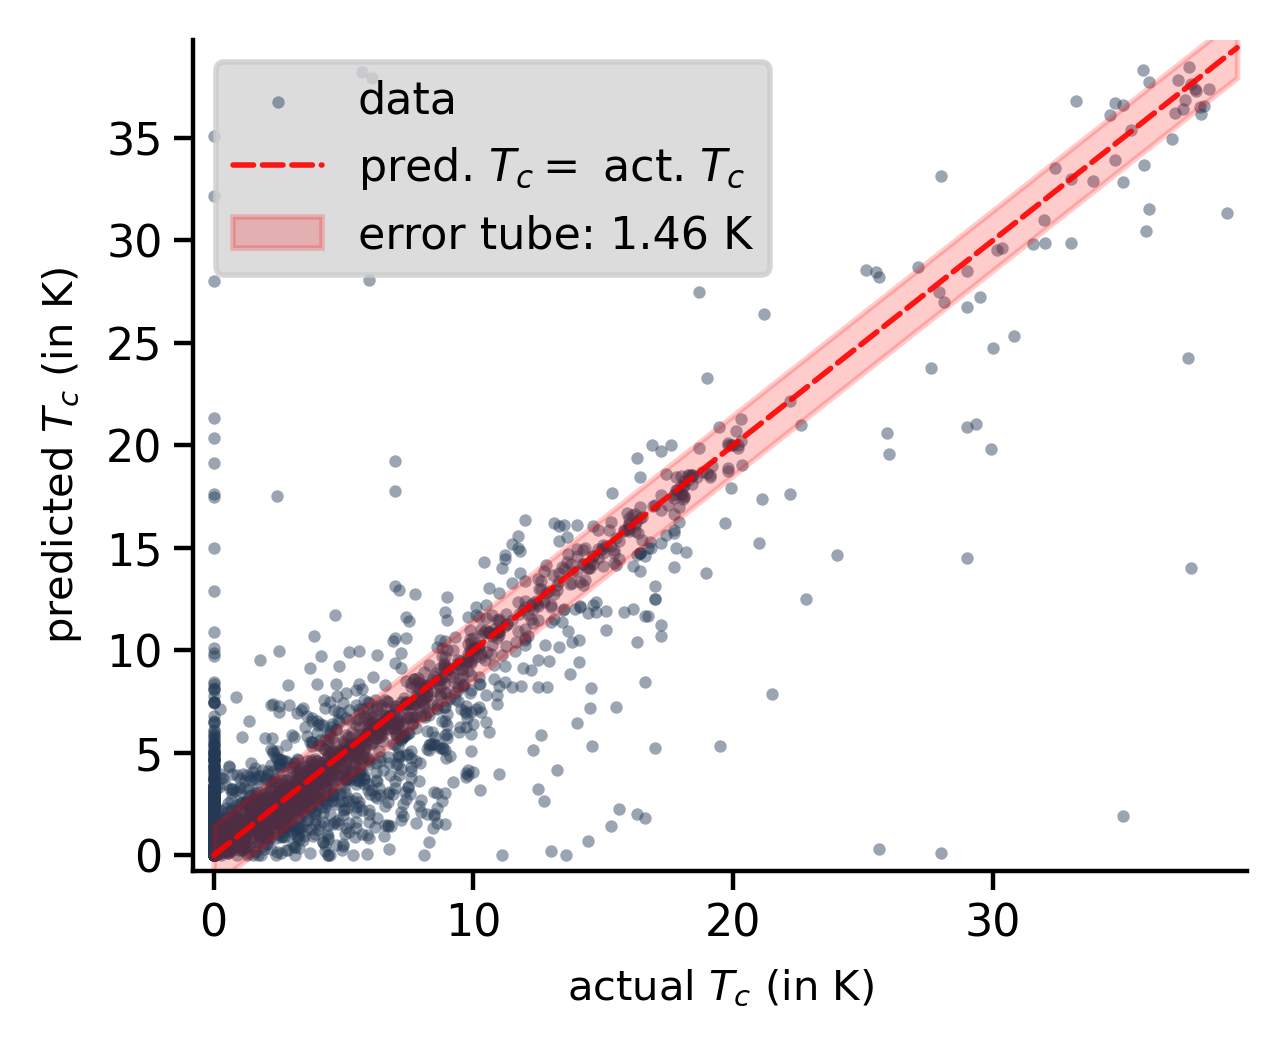

In [10]:
ph.plot_predicted_actual(
    pickle_name="predicted_actual/pa_blank_nc_normal.pkl", 
    markersize=20,
    tube_height=1.46,
    alpha=0.2,
    scatter_alpha=0.45,
    linewidth=1,
    marker=".",
    remove_above=50
    )

Inside tube: 1932
Outside tube: 865
All datapoints: 2797
69.07 % of datapoints are inside error bar


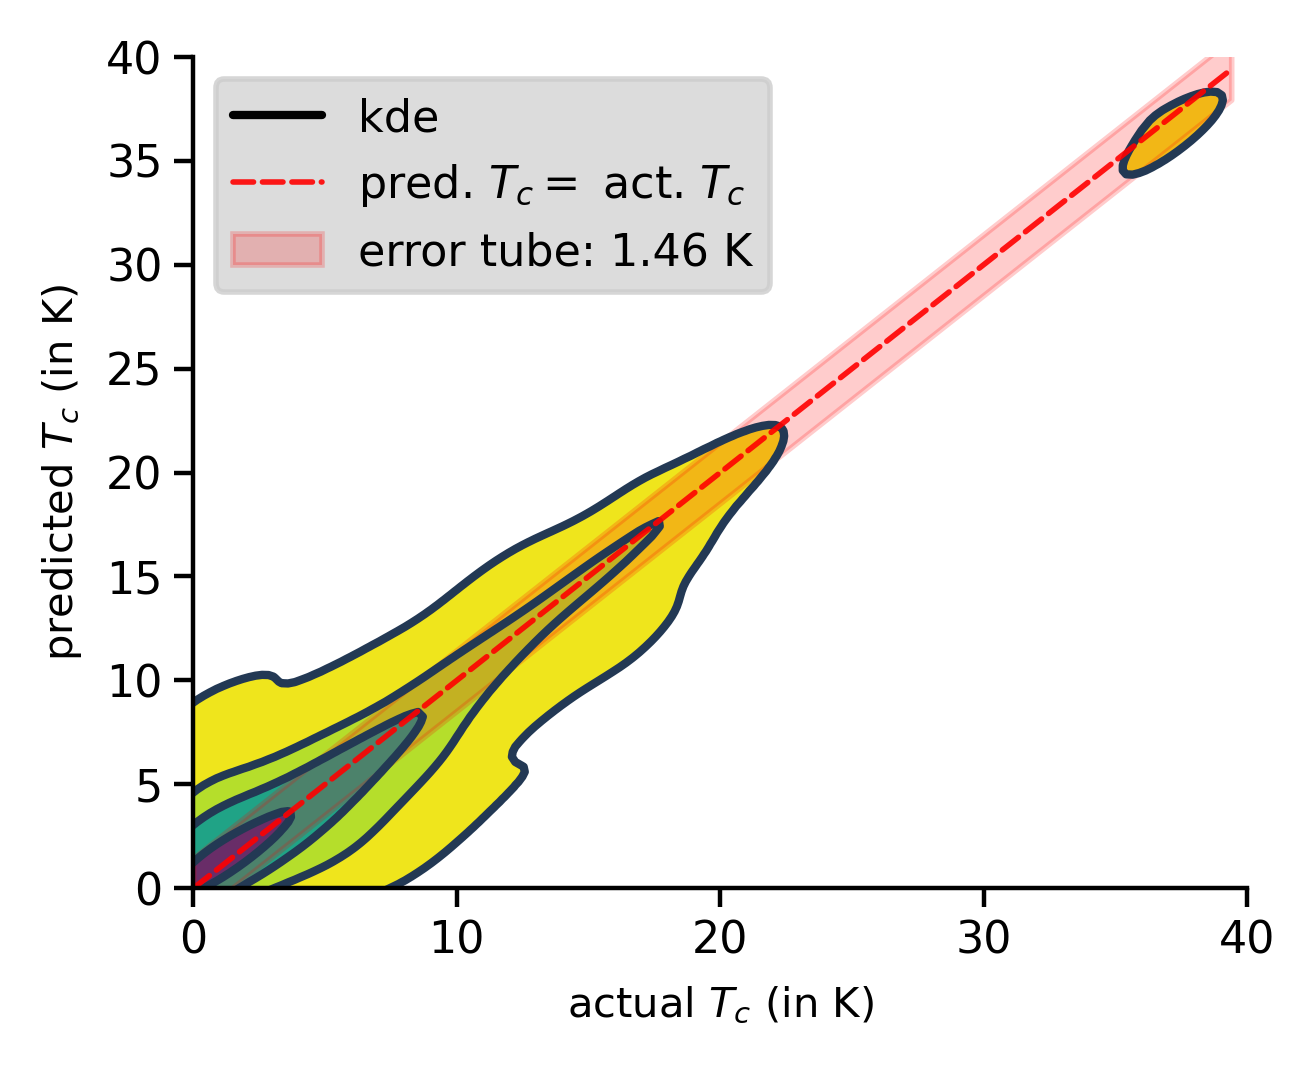

In [91]:
ph.plot_predicted_actual(
    pickle_name="predicted_actual/pa_blank_nc_normal.pkl", 
    tube_height=1.46,
    alpha=0.2,
    scatter_alpha=0.45,
    linewidth=1,
    marker=".",
    remove_above=50,
    show_kde=True,
    levels = [0.05,0.2,0.4,0.8,1],
    manual_limit=True,
    colormap = "viridis_r"
    )

# Predictions

The following code was not executed in the jupyter notebook, which is why it will not display results.

Without enormous amount of computation time you will not be able run the following code.
The results of the predictions are therefore uploaded into the appropriate folder.
Note that I only uploaded predictions with $T_c\geq 10$, as the file containing all predictions is 2.7 GB large. 

## New Predictions

### Create compositions to predict

In [ ]:
#do not execute this code, as it will take a lot of computation time (for me it was 21 days)
#for some reason obtaining material properties from matminer takes about 0.06s for one composition
#this code will collect the material properties for about 30 million compositions
DiM.create_pickle_predictors(DiM.all_patterns)

### make predictions

In [ ]:
mlm.make_predictions(
    data_location="Pickle_data/predictors",
    setting_location="Pickle_data/hp_settings",
    promising_cT=10,
    num_for_average=100,
    print_progression_to_console=True
)

### Create a predictions file that is easier to interpret

In [ ]:
mlm.analyse_predicted(data_location="Predictions", combine=True)

### distribution of predicted $T_c$

In [ ]:
ph.plot_predicted_distribution(
    name_or_directory="Predictions", 
    y_scale="log", 
    ylim=[1,10**8], 
    xlim=[0,None], 
    alpha=0.2, 
    temperature_threshold=10
    )

## Predictions of other research groups

exemplarily shown ones

In [ ]:
mlm.predict_specific(
    predict_compositions=mlm.pred_konno,
    setting_location="Pickle_data/hp_settings",
    promising_cT=0,
    test_temps=mlm.pred_konno_temp,
    num_for_average=100,
    print_progression_to_console=True,
    data_path_name = "konno"
)